# Performance Skyline and Anomaly Detection
The perfomance skyline of a trace contains only the events in the critical path

In [1]:
#%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

In [2]:
import sys
sys.path.append('..')

In [3]:
from processmining.plot import point_transformer as pt

In [6]:
csv_list = []
appended = pd.DataFrame()
#LUIGI_LOG_PATH='/usr/local/trustyou/home/andream/nfs/processmining/experiments'
LUIGI_LOG_PATH = '/usr/local/trustyou/home/andream/nfs/processmining/minilogs/daily/logs/07-09_three_months'
#LUIGI_LOG_PATH = '/usr/local/trustyou/home/andream/nfs/processmining/minilogs/daily/'
#LUIGI_LOG_PATH='/usr/local/trustyou/home/andream/git_tree/processmining/tests/data/'
#LUIGI_LOG_PATH = '/usr/local/trustyou/home/andream/nfs/processmining/minilogs/table-precomp/logs/october/'
#LUIGI_LOG_PATH = '/usr/local/trustyou/home/andream/nfs/processmining/minilogs/table-precomp/logs/tch/'
for filename in os.listdir(LUIGI_LOG_PATH):
    #if filename.endswith('.csv') and filename.startswith('catts_2traces_7act_varDevBothTimes_varDurDev_running-example.csv'):
    #if filename.endswith('.csv') and filename.startswith('catts_1trace_7act_v'):
    #if filename.endswith('.csv') and filename.startswith('catts_1trace_7act_0dur_running-example.csv'):
    #if filename.endswith('.csv') and filename.startswith('catts_1trace_7act_1dayDur_meets_running-example.csv'):
    #if filename.endswith('.csv') and filename.startswith('catts_1trace_7act_meetsStarts'):
    if filename.endswith('.csv') and filename.startswith(''):
        log_path = LUIGI_LOG_PATH+'/'+filename
        csv_list.append(filename)
        print('Preprocessing... ',log_path)
        df = pd.read_csv(log_path, index_col=False)
        appended = appended.append(df)

#appended_df
csv_list.sort()
print(csv_list)

filename = os.path.splitext(csv_list[0])[0]

#appended_df.to_datetime(start_time, format="%Y-%m-%d:%H:%M:%S").sort_values()
appended['start_time'] = pd.to_datetime(appended['start_time'], format="%Y-%m-%d %H:%M:%S").sort_values()
appended['end_time'] = pd.to_datetime(appended['end_time'], format="%Y-%m-%d %H:%M:%S").sort_values()
appended = appended.sort_values(by=['start_time'], ascending=True)
appended['case'] = appended.apply(lambda row: str(row['case']), axis=1)
print('contains',len(appended), 'events/points')
appended.head()

Preprocessing...  /usr/local/trustyou/home/andream/nfs/processmining/minilogs/daily/logs/07-09_three_months/daily.2019-0.csv
['daily.2019-0.csv']
contains 61914 events/points


Unnamed: 0                       case  \
26949           0  daily.2019-07-01_10-28-01   
26950           1  daily.2019-07-01_10-28-01   
26951           2  daily.2019-07-01_10-28-01   
26952           3  daily.2019-07-01_10-28-01   
26953           4  daily.2019-07-01_10-28-01   

                                                activity          start_time  \
26949                                           AllTasks 2019-07-01 10:28:42   
26950  DumpTask(sql_filename=other_urls)(kvs=None)(ch... 2019-07-01 10:41:26   
26951  DumpTask(sql_filename=reprocess_urls)(kvs=None... 2019-07-01 10:41:26   
26952  DumpTask(sql_filename=regular_urls)(kvs=None)(... 2019-07-01 10:41:26   
26953                                     ProxySetupTask 2019-07-01 10:41:26   

                 end_time  
26949 2019-07-03 00:20:26  
26950 2019-07-01 10:46:18  
26951 2019-07-01 10:43:09  
26952 2019-07-01 11:44:24  
26953 2019-07-01 10:54:43

In [7]:
 excluding = pt.get_relative_timestamps(appended, ['AllTasks']) #'AllTasks' is one entry per log with its overall duration

print('Data set contains:')
print('- ',len(excluding),'events')
print('- ',len(excluding['case'].unique()),'cases')
print('- ',len(excluding['activity'].unique()),'activities')

excluding.head()

Data set contains:
-  61894 events
-  50 cases
-  261 activities


case  \
215  daily.2019-07-01_10-28-01   
219  daily.2019-07-01_10-28-01   
220  daily.2019-07-01_10-28-01   
221  daily.2019-07-01_10-28-01   
222  daily.2019-07-01_10-28-01   

                                              activity rel_start  rel_end  \
215  DumpTask(sql_filename=regular_urls)(kvs=None)(...   0:12:44  1:15:42   
219  DumpTask(sql_filename=other_urls)(kvs=None)(ch...   0:12:44  0:17:36   
220                                      CrawlFeedTask   0:12:44  0:29:54   
221                                     ProxySetupTask   0:12:44  0:26:01   
222  DumpTask(sql_filename=reprocess_urls)(kvs=None...   0:12:44  0:14:27   

     num_start  num_end          start_time            end_time  
215      764.0   4542.0 2019-07-01 10:41:26 2019-07-01 11:44:24  
219      764.0   1056.0 2019-07-01 10:41:26 2019-07-01 10:46:18  
220      764.0   1794.0 2019-07-01 10:41:26 2019-07-01 10:58:36  
221      764.0   1561.0 2019-07-01 10:41:26 2019-07-01 10:54:43  
222      764.0    867.0 2019-07-01 10:41:26 2019-07-01 10:43:09

In [8]:
#pt.plot_all_traces(excluding, show_plot=None)

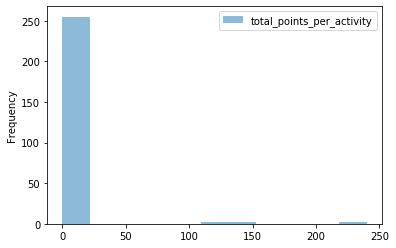

In [9]:
all_by_activity = excluding.groupby('activity').size().reset_index(name='total_points_per_activity').sort_values(by=['total_points_per_activity'], ascending=False)
all_by_activity['total_points_per_activity']=all_by_activity.apply(lambda row: round(row['total_points_per_activity']/50), axis=1)
all_by_activity.plot.hist(bins=11, alpha=0.5)

In [10]:
print('Frequency of activities having more than 1 event per activity ',len(all_by_activity[all_by_activity['total_points_per_activity']>1]), '\n')
print(all_by_activity[all_by_activity['total_points_per_activity']>1])
all_by_activity[all_by_activity['total_points_per_activity']>1].plot.hist(bins=11, alpha=0.5)

Frequency of activities having more than 1 event per activity  6 

                                         activity  total_points_per_activity
72     CrawlTask(crawler=creepy-crawly)(chunk=01)                        240
133  ExtractTask(crawler=creepy-crawly)(chunk=01)                        240
135  ExtractTask(crawler=creepy-crawly)(chunk=03)                        139
74     CrawlTask(crawler=creepy-crawly)(chunk=03)                        138
134  ExtractTask(crawler=creepy-crawly)(chunk=02)                        118
73     CrawlTask(crawler=creepy-crawly)(chunk=02)                        118


## Compute average trace
Average skyline contains a point per activity, depicting the average start and average end timestamps of it.

In [11]:
average_trace_activities = pt.get_data_selection_avgtrace(pt.get_relative_timestamps(excluding)).sort_values(by=['num_start'])
print('Average trace over activities has',len(average_trace_activities),'events')
average_trace_activities.head()
#print('AllTasks' in average_trace_activities)

Average trace over activities has 261 events


activity average_start  \
1                                      CrawlFeedTask      00:00:00   
0  DumpTask(sql_filename=regular_urls)(kvs=None)(...      00:00:07   
4  DumpTask(sql_filename=other_urls)(kvs=None)(ch...      00:00:08   
5  DumpTask(sql_filename=daily_urls)(kvs=None)(ch...      00:00:12   
2                                     ProxySetupTask      00:00:17   

  average_end  num_start      num_end          case   std_num_end  
1    00:19:08   0.040000  1148.380000  Average Case  0.000000e+00  
0    00:25:05   7.220000  1505.400000  Average Case  4.593642e-13  
4    00:01:10   8.440000    70.040000  Average Case  0.000000e+00  
5    00:01:30  12.920000    90.020000  Average Case  2.871026e-14  
2    00:13:22  17.745098   802.117647  Average Case  1.148181e-13

In [12]:
#pt.plot_all_traces(average_trace_activities, show_plot=None)

In case only one subset of activities from the whole data set should be investigated

In [13]:
pd.set_option('display.max_colwidth', -1)

index_used=[[117,120]]
#Indexes used for produced 'graphs/avgActSlideSplit/' (to have an avg of 400 points per visualization)
#index_used=[[0,31],[21,51],[41,71],[61,91],[81,111],[87,117],
#            [101,119],[117,120],[118,122],[120,126],[123,156],
#            [139,170],[141,171],[170,178],[175,216],[206,246],[216,256]]

for indexes in index_used:
    #subset = appended[appended['activity'].str.startswith('ExtractTask') & appended['case']]
    subset = appended[appended['activity'].isin(average_trace_activities['activity'][indexes[0]:indexes[1]])]
    #subset = appended[appended['activity'].isin(average_trace_activities[indexes[0]:indexes[1]]) & ~appended['activity'].str.startswith('ExtractTask(crawler=creepy-crawly)(chunk')]

    output_prefix = LUIGI_LOG_PATH+'graphs/avgActSlideSplit/'+filename+'All_'+str(indexes[0])+'_'+str(indexes[1])+'act_'+str(len(subset))+'pts'
    #print(output_prefix)

output_prefix = LUIGI_LOG_PATH+'graphs/'+filename
print(output_prefix)
#snippet = pt.plot_point_transformer_selection(subset, output_prefix)
subset = pt.get_relative_timestamps(subset, ['AllTasks'])
print('There are ', len(subset),'subset entries in the activities interval:',index_used[0])

subset.head()


/usr/local/trustyou/home/andream/nfs/processmining/minilogs/daily/logs/07-09_three_monthsgraphs/daily.2019-0


<ipython-input-13-290f775b33c2>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


There are  24072 subset entries in the activities interval: [117, 120]


case                                    activity  \
0     daily.2019-07-01_10-28-01  CrawlTask(crawler=creepy-crawly)(chunk=01)   
1063  daily.2019-07-01_10-28-01  CrawlTask(crawler=creepy-crawly)(chunk=01)   
1064  daily.2019-07-01_10-28-01  CrawlTask(crawler=creepy-crawly)(chunk=01)   
1065  daily.2019-07-01_10-28-01  CrawlTask(crawler=creepy-crawly)(chunk=01)   
1066  daily.2019-07-01_10-28-01  CrawlTask(crawler=creepy-crawly)(chunk=01)   

     rel_start  rel_end  num_start  num_end          start_time  \
0     0:00:00   1:30:59  0.0        5459.0  2019-07-01 13:02:49   
1063  0:00:00   1:55:42  0.0        6942.0  2019-07-01 13:02:49   
1064  0:00:00   2:32:23  0.0        9143.0  2019-07-01 13:02:49   
1065  0:00:00   1:46:41  0.0        6401.0  2019-07-01 13:02:49   
1066  0:00:00   1:34:22  0.0        5662.0  2019-07-01 13:02:49   

                end_time  
0    2019-07-01 14:33:48  
1063 2019-07-01 14:58:31  
1064 2019-07-01 15:35:12  
1065 2019-07-01 14:49:30  
1066 2019-07-01 14:37:11

In [14]:
subset = excluding.copy() #Comment this out to only examine a certain snippet of the subset from above

## Compute Performance Skyline

In [15]:
skyline_points = pt.get_skyline_points(subset)
representative = skyline_points[['case','activity']].drop_duplicates()

print(len(subset),' points in total distributed among', len(subset['case'].unique()), 'cases\n\nInfo about the skyline:')
print('- ',len(skyline_points),'/',len(subset),'=', round(len(skyline_points)/len(subset)*100,2), '% events are part of a skyline')
print('- ',len(skyline_points['activity'].unique()),'/',len(subset['activity'].unique()),'=', round(len(skyline_points['activity'].unique())/len(subset['activity'].unique())*100,2), 'activities are part of a skyline.')
print('- ',len(representative),'/',len(skyline_points),'=', round(len(representative)/len(skyline_points)*100,2), '% unique activities on the skylines.') 
print("   'Unique' meaning there are no two points with the same 'activity' on the skyline of the same trace. ")

skyline_points.head()

61894  points in total distributed among 50 cases

Info about the skyline:
-  3201 / 61894 = 5.17 % events are part of a skyline
-  111 / 261 = 42.53 activities are part of a skyline.
-  1532 / 3201 = 47.86 % unique activities on the skylines.
   'Unique' meaning there are no two points with the same 'activity' on the skyline of the same trace. 


num_start  num_end  \
0  764.0      4542.0    
1  764.0      4542.0    
2  764.0      4542.0    
3  764.0      4542.0    
4  764.0      4542.0    

                                                      activity  \
0  DumpTask(sql_filename=regular_urls)(kvs=None)(chunk=prep)     
1  DumpTask(sql_filename=other_urls)(kvs=None)(chunk=prep)       
2  CrawlFeedTask                                                 
3  ProxySetupTask                                                
4  DumpTask(sql_filename=reprocess_urls)(kvs=None)(chunk=prep)   

                        case  
0  daily.2019-07-01_10-28-01  
1  daily.2019-07-01_10-28-01  
2  daily.2019-07-01_10-28-01  
3  daily.2019-07-01_10-28-01  
4  daily.2019-07-01_10-28-01

## Stats by Case

In [16]:
all_by_case = subset.groupby('case').size().reset_index(name='total_points_in_case').sort_values(by=['total_points_in_case'], ascending=False)
skyline_by_case = skyline_points.groupby('case').size().reset_index(name='skyline_points_in_case').sort_values(by=['skyline_points_in_case'], ascending=False)
r_by_case = representative.groupby('case').size().reset_index(name='unique_skyline_activities_in_case').sort_values(by=['unique_skyline_activities_in_case'], ascending=False)
by_case = r_by_case.merge(skyline_by_case, on='case', how='inner')
#all_by_case.plot.hist(bins=8, alpha=0.5)

all_by_activity = subset.groupby('activity').size().reset_index(name='total_points_per_activity').sort_values(by=['total_points_per_activity'], ascending=False)
all_by_activity['total_points_per_activity']=all_by_activity.apply(lambda row: round(row['total_points_per_activity']/50), axis=1)

In [17]:
#pt.plot_all_traces(subset[subset['case']==subset['case'].unique()[10]], show_plot=None)

In [18]:
merged_by_case = by_case.merge(all_by_case)[['case','total_points_in_case','skyline_points_in_case', 'unique_skyline_activities_in_case']].sort_values(by=['total_points_in_case'], ascending=False)
merged_by_case['skyline_percentage'] = merged_by_case.apply(lambda row: round(row['skyline_points_in_case']/row['total_points_in_case']*100,2), axis=1)
merged_by_case['unique_percentage'] = merged_by_case.apply(lambda row: round(row['unique_skyline_activities_in_case']/row['skyline_points_in_case']*100,2), axis=1)
print('Expectation/Averages: \ntotal_points_in_case:\t\t\t',round(merged_by_case['total_points_in_case'].mean(),2))
print('skyline_points_in_case:\t\t\t',round(merged_by_case['skyline_points_in_case'].mean(),2))
print('unique_skyline_activities_in_case:\t',round(merged_by_case['unique_skyline_activities_in_case'].mean(),2))
print('skyline_percentage:\t\t\t',round(merged_by_case['skyline_percentage'].mean(),2))
print('unique_percentage:\t\t\t',round(merged_by_case['unique_percentage'].mean(),2))
merged_by_case.head()

Expectation/Averages: 
total_points_in_case:			 1237.88
skyline_points_in_case:			 64.02
unique_skyline_activities_in_case:	 30.64
skyline_percentage:			 5.15
unique_percentage:			 49.26


case  total_points_in_case  skyline_points_in_case  \
13  daily.2019-08-21_18-17-01  1252                  71                       
30  daily.2019-09-22_07-40-01  1252                  68                       
5   daily.2019-09-18_14-08-01  1251                  65                       
40  daily.2019-07-13_21-50-01  1251                  60                       
32  daily.2019-09-04_23-23-01  1251                  64                       

    unique_skyline_activities_in_case  skyline_percentage  unique_percentage  
13  34                                 5.67                47.89              
30  30                                 5.43                44.12              
5   38                                 5.20                58.46              
40  26                                 4.80                43.33              
32  29                                 5.12                45.31

# Anomaly Detection

In [19]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np 
from matplotlib.ticker import FuncFormatter


In [20]:
def plot_star_from_point(s_plot, reference_points, body_points, anomaly_name=None):
    missing_label = ['present','missing']
    #unique_trace = data_selection['case'].unique().tolist()
    colorlist = ["green", "red"]
    by_missing = dict(zip(missing_label, colorlist)) 

    axis = s_plot.get_axes()
    average_skyline = reference_points
    
    if anomaly_name == 'skyline_points_in_case':
            average_skyline = pt.get_skyline_points(reference_points)
  
    if anomaly_name == 'activity_set':
        average_skyline = body_points
        body_points = reference_points

    axis[0].plot(body_points['num_start'],body_points['num_end'],color='orange',linewidth=1.5)    
    axis[0].plot(average_skyline['num_start'],average_skyline['num_end'],color='green',linewidth=1.5)
        
    missing = average_skyline[~average_skyline['activity'].isin(body_points['activity'].unique())]
    
    for index, reference_point in missing.iterrows(): 
        x = []
        y = []
        x.append(reference_point['num_start'])
        y.append(reference_point['num_end'])
        axis[0].plot(x,y, label = 'missing', marker='s', color='red', markersize=8)
     

    if anomaly_name in ['skyline_points_in_case','activity_set']:
        for index, reference_point in reference_points.iterrows(): 
            for jndex, point in body_points[body_points['activity']==reference_point['activity']].iterrows():
                x = []
                y = []
                x.append(reference_point['num_start'])
                x.append(point['num_start'])
                y.append(reference_point['num_end'])
                y.append(point['num_end'])
                axis[0].plot(x,y,color='black', linewidth=0.5)
            
        

    handles, labels = axis[0].get_legend_handles_labels()
    expectation = mlines.Line2D([], [], color='green', marker='_', markersize=15, label='Average Trace')
    anomaly = mlines.Line2D([], [], color='orange', marker='_',markersize=15, label='Anomaly Trace')
    missing_legend = mlines.Line2D([], [], color='red', marker='s',markersize=10, label='missing activities')
    
    handles_all = list(dict.fromkeys(handles))
    axis[0].legend(handles=[expectation, anomaly, missing_legend])
    
    return s_plot

    
    present_legend = mlines.Line2D([], [], color='green', marker='s',markersize=10, label='present activities')
    present = reference_points[reference_points['activity'].isin(body_points['activity'].unique())]
    for index, reference_point in present.iterrows(): 
        x = []
        y = []
        x.append(reference_point['num_start'])
        y.append(reference_point['num_end'])
        axis[0].plot(x,y, label='present', marker='s', color='green')

    mutual = reference_point[reference_point['activity']==body_points['activity']]

    
    #skyline_plot.show()
    return s_plot

#plot_star_from_point(some_plot,average_trace_activities,anomaly_suspects, anomaly_name='skyline_points_in_case')

In [21]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '%11.1i'% (x)+'%' 

def threshold_histogram(input_data, bucket=None, anomaly_name=None, in_percentage=None, x_axis_name=None):
    plt.rcdefaults()
    fig, ax = plt.subplots(figsize=(20, 20))

    input_data= input_data.sort_values(by=anomaly_name, ascending=False)
    # Example data
    y_values = input_data[bucket]
    y_pos = np.arange(len(y_values))
    x_values = input_data[anomaly_name]
    error = 0

    formatter = FuncFormatter(millions)

    ax.barh(y_pos, x_values, xerr=error, align='center')
    if in_percentage:
        ax.xaxis.set_major_formatter(formatter)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(y_values)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel(x_axis_name)
    ax.set_title(x_axis_name+' per '+bucket+' id')
    return plt

#threshold_histogram(merged_by_case, bucket='case', anomaly_name='skyline_percentage',in_percentage=1, x_axis_name='Percentage of events in skyline')

In [22]:
def evaluate_condition(condition, content, anomaly_name=None, bucket=None):
#    if bucket == 'activity': 
#        anomaly_results = content
    anomaly_results = content[(content[anomaly_name]<condition['lower_bound']) | (content[anomaly_name]>condition['upper_bound'])]
    return len(anomaly_results), anomaly_results[bucket].unique()
    
def get_anomaly_results(input_data, std_factors=range(10), anomaly_name=None, bucket=None):
    
    anomaly_condition = pd.DataFrame()
    anomaly_condition['factor_std'] = std_factors
    if bucket == 'activity': 
        anomaly_condition['average']=input_data.mean(axis=1).apply(math.floor)
        anomaly_condition['std']=input_data.std(axis=1)
    anomaly_condition['average'] =round(input_data[anomaly_name].mean(),2)
    anomaly_condition['std'] =round(input_data[anomaly_name].std(),2)
    anomaly_condition['lower_bound'] = anomaly_condition.apply(lambda row: round(max(row['average']-row['factor_std']*row['std'],0),2), axis=1)
    anomaly_condition['upper_bound'] = anomaly_condition.apply(lambda row: round(max(row['average']+row['factor_std']*row['std'],0),2), axis=1)
    anomaly_condition[['number_of_anomalies','anomaly_traces']] = anomaly_condition.apply(lambda row: evaluate_condition(row, input_data, anomaly_name=anomaly_name, bucket=bucket), result_type='expand', axis=1)

    return anomaly_condition

#get_anomaly_results(merged_by_case, std_factors=[ 1.5**x for x in range(16)], anomaly_name='skyline_percentage', bucket='case').head()

### Anomaly of number of points in trace: 

#### Causes for this anomaly:  
* More activities than expected being restarted. (for upper bound)
* A trace being unexpectedly interrupted. (for lower bound)
* A log being incomplete. (for lower bound)

In [23]:
threshold_events_trace = threshold_histogram(merged_by_case, bucket='case', anomaly_name='total_points_in_case', x_axis_name='Number of events in trace')
#output_path = LUIGI_LOG_PATH+'/../../graphs/allDataAtOnce/daily.2019-0709_three_months_anomaly_threshold_num_events_trace.png'
#plt.savefig(output_path,  bbox_inches='tight')

In [24]:
anomaly_number_of_events_trace_results = get_anomaly_results(merged_by_case, std_factors=[ 1.5**x for x in range(8)], anomaly_name='total_points_in_case', bucket='case')
#output_path = LUIGI_LOG_PATH+'/../../graphs/allDataAtOnce/daily.2019-0709_three_months_anomaly_results_num_events_trace.csv'
#anomaly_number_of_events_trace_results.to_csv(output_path, index = None, header=True)
anomaly_number_of_events_trace_results

factor_std  average    std  lower_bound  upper_bound  number_of_anomalies  \
0  1.000000    1237.88  71.62  1166.26      1309.50      1                     
1  1.500000    1237.88  71.62  1130.45      1345.31      1                     
2  2.250000    1237.88  71.62  1076.74      1399.02      1                     
3  3.375000    1237.88  71.62  996.16       1479.60      1                     
4  5.062500    1237.88  71.62  875.30       1600.46      1                     
5  7.593750    1237.88  71.62  694.02       1781.74      0                     
6  11.390625   1237.88  71.62  422.08       2053.68      0                     
7  17.085938   1237.88  71.62  14.19        2461.57      0                     

                anomaly_traces  
0  [daily.2019-09-24_05-05-02]  
1  [daily.2019-09-24_05-05-02]  
2  [daily.2019-09-24_05-05-02]  
3  [daily.2019-09-24_05-05-02]  
4  [daily.2019-09-24_05-05-02]  
5  []                           
6  []                           
7  []

In [25]:
extreme_anomalies = anomaly_number_of_events_trace_results[anomaly_number_of_events_trace_results['number_of_anomalies']>=1].tail(1)
print(extreme_anomalies[['average','std','factor_std','lower_bound','upper_bound']])
print('The following anomalies were found:')
anomaly_case_id = extreme_anomalies['anomaly_traces'].values[0]
suspects_stats = merged_by_case[merged_by_case['case'].isin(anomaly_case_id)]
suspects_stats.head()

   average    std  factor_std  lower_bound  upper_bound
4  1237.88  71.62  5.0625      875.3        1600.46    
The following anomalies were found:


case  total_points_in_case  skyline_points_in_case  \
49  daily.2019-09-24_05-05-02  742                   20                       

    unique_skyline_activities_in_case  skyline_percentage  unique_percentage  
49  10                                 2.7                 50.0

In [26]:
# Preparing anomaly to be plotted:

cases_to_plot = anomaly_case_id.tolist()
cases_to_plot.append('Average Case')
print("- Cases to be plotted:",cases_to_plot)

anomaly_suspects = subset[subset['case'].isin(cases_to_plot)]
print('- Number of activities in suspect trace:',len(anomaly_suspects['activity'].unique()))

average_trace_activities = pt.get_data_selection_avgtrace(pt.get_relative_timestamps(subset)).sort_values(by=['num_start'])[0:len(anomaly_suspects['activity'].unique())+20]
print('- Number of activities in average trace:',len(average_trace_activities))
print('- Number of activities in average trace but not in anomaly traces:',len(average_trace_activities[~average_trace_activities['activity'].isin(anomaly_suspects['activity'].unique())]))

average_skyline_activities = average_trace_activities[average_trace_activities['activity'].isin(anomaly_suspects['activity'].unique())]
#print(len(average_skyline_activities['activity'].unique()))


anomaly_suspects_and_average = pd.concat([anomaly_suspects, average_trace_activities[['num_start','num_end','activity','case', 'std_num_end']]], ignore_index=True)                                          
suspects_and_average=anomaly_suspects_and_average.copy()
print("- Number of events to be plotted:",len(anomaly_suspects_and_average))

suspects_and_average.head()


- Cases to be plotted: ['daily.2019-09-24_05-05-02', 'Average Case']
- Number of activities in suspect trace: 134
- Number of activities in average trace: 154
- Number of activities in average trace but not in anomaly traces: 20
- Number of events to be plotted: 896


case  \
0  daily.2019-09-24_05-05-02   
1  daily.2019-09-24_05-05-02   
2  daily.2019-09-24_05-05-02   
3  daily.2019-09-24_05-05-02   
4  daily.2019-09-24_05-05-02   

                                                      activity rel_start  \
0  ProxySetupTask                                               0:14:38    
1  DumpTask(sql_filename=daily_urls)(kvs=None)(chunk=prep)      0:14:38    
2  DumpTask(sql_filename=reprocess_urls)(kvs=None)(chunk=prep)  0:14:38    
3  CrawlFeedTask                                                0:14:38    
4  DumpTask(sql_filename=regular_urls)(kvs=None)(chunk=prep)    0:14:38    

   rel_end  num_start  num_end          start_time            end_time  \
0  0:27:13  878.0      1633.0  2019-09-24 05:20:10 2019-09-24 05:32:45   
1  0:16:00  878.0      960.0   2019-09-24 05:20:10 2019-09-24 05:21:32   
2  0:15:31  878.0      931.0   2019-09-24 05:20:10 2019-09-24 05:21:03   
3  0:38:11  878.0      2291.0  2019-09-24 05:20:10 2019-09-24 05:43:43   
4  0:34:49  878.0      2089.0  2019-09-24 05:20:10 2019-09-24 05:40:21   

   std_num_end  
0 NaN           
1 NaN           
2 NaN           
3 NaN           
4 NaN

In [66]:
#output_path = LUIGI_LOG_PATH+'/../../graphs/allDataAtOnce/daily.2019-0709_three_months_anomaly_number_events_trace_example.png'
some_plot = pt.plot_all_traces(suspects_and_average)#, output_path=output_path
some_plot = plot_star_from_point(some_plot,average_trace_activities,anomaly_suspects)
some_plot.show()
#some_plot.savefig(output_path,  bbox_inches='tight')

### Anomaly of percentage of skyline points

#### Causes for this anomaly: 
* Deviation on specific activity/ies for a specific trace
* Upper: Tasks that normally do not last that long are

Open questions: 
* Further investigate points in shadow of each other.

<module 'matplotlib.pyplot' from '/usr/local/trustyou/home/andream/anaconda3/envs/processmining_venv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

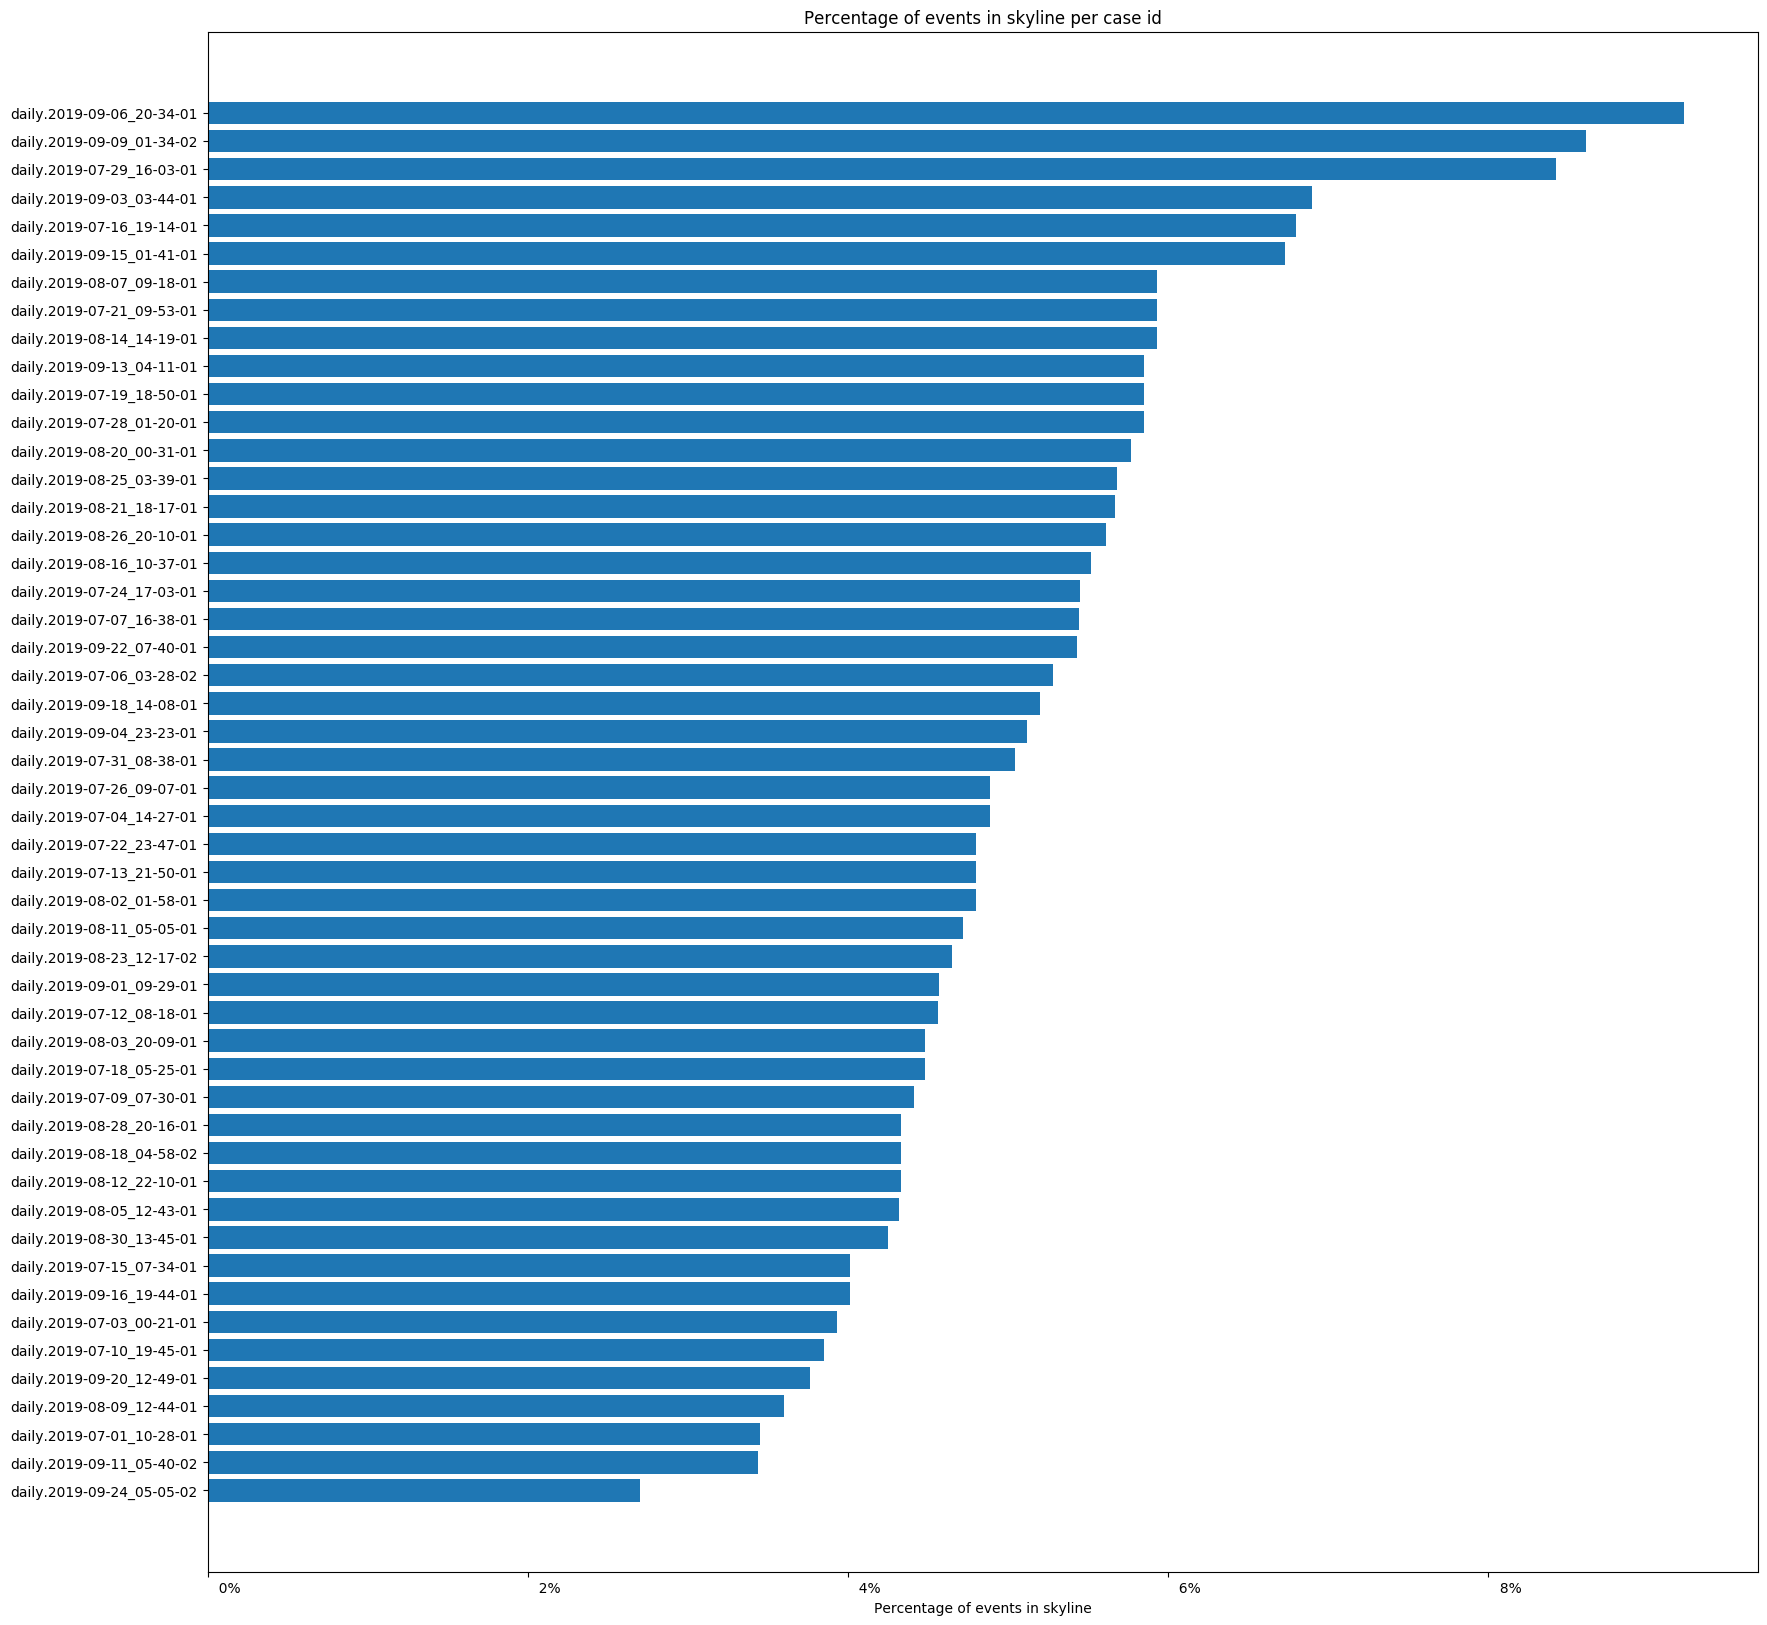

In [28]:
#threshold_histogram(merged_by_case, bucket='case', anomaly_name='skyline_points_in_case', x_axis_name='Number of events in skyline')
threshold_histogram(merged_by_case, bucket='case', anomaly_name='skyline_percentage',in_percentage=1, x_axis_name='Percentage of events in skyline')

#output_path = LUIGI_LOG_PATH+'/../../graphs/allDataAtOnce/daily.2019-0709_three_months_anomaly_threshold_num_events_skyline.png'
#plt.savefig(output_path,  bbox_inches='tight')

In [29]:
anomaly_number_of_events_skyline_results = get_anomaly_results(merged_by_case, std_factors=[ 1.5**x for x in range(8)], anomaly_name='skyline_percentage', bucket='case')

#output_path = LUIGI_LOG_PATH+'/../../graphs/allDataAtOnce/daily.2019-0709_three_months_anomaly_results_per_events_skyline.csv'
#anomaly_number_of_events_skyline_results.to_csv(output_path, index = None, header=True)
anomaly_number_of_events_skyline_results

factor_std  average   std  lower_bound  upper_bound  number_of_anomalies  \
0  1.000000    5.15     1.28  3.87         6.43         12                    
1  1.500000    5.15     1.28  3.23         7.07         4                     
2  2.250000    5.15     1.28  2.27         8.03         3                     
3  3.375000    5.15     1.28  0.83         9.47         0                     
4  5.062500    5.15     1.28  0.00         11.63        0                     
5  7.593750    5.15     1.28  0.00         14.87        0                     
6  11.390625   5.15     1.28  0.00         19.73        0                     
7  17.085938   5.15     1.28  0.00         27.02        0                     

                                                                                                                                                                                                                                                                                                                         anomaly_traces  
0  [daily.2019-07-16_19-14-01, daily.2019-09-11_05-40-02, daily.2019-08-09_12-44-01, daily.2019-09-20_12-49-01, daily.2019-09-15_01-41-01, daily.2019-07-10_19-45-01, daily.2019-09-06_20-34-01, daily.2019-09-03_03-44-01, daily.2019-07-01_10-28-01, daily.2019-07-29_16-03-01, daily.2019-09-09_01-34-02, daily.2019-09-24_05-05-02]  
1  [daily.2019-09-06_20-34-01, daily.2019-07-29_16-03-01, daily.2019-09-09_01-34-02, daily.2019-09-24_05-05-02]                                                                                                                                                                                                                          
2  [daily.2019-09-06_20-34-01, daily.2019-07-29_16-03-01, daily.2019-09-09_01-34-02]                                                                                                                                                                                                                                                     
3  []                                                                                                                                                                                                                                                                                                                                    
4  []                                                                                                                                                                                                                                                                                                                                    
5  []                                                                                                                                                                                                                                                                                                                                    
6  []                                                                                                                                                                                                                                                                                                                                    
7  []

In [30]:
extreme_anomalies = anomaly_number_of_events_skyline_results[anomaly_number_of_events_skyline_results['number_of_anomalies']>=1].tail(1)
print(extreme_anomalies[['average','std','factor_std','lower_bound','upper_bound']])
print('The following anomalies were found:')
anomaly_case_id = extreme_anomalies['anomaly_traces'].values[0]
suspects_stats = merged_by_case[merged_by_case['case'].isin(anomaly_case_id)]
suspects_stats.head()

   average   std  factor_std  lower_bound  upper_bound
2  5.15     1.28  2.25        2.27         8.03       
The following anomalies were found:


case  total_points_in_case  skyline_points_in_case  \
2  daily.2019-09-06_20-34-01  1247                  115                      
1  daily.2019-07-29_16-03-01  1247                  105                      
0  daily.2019-09-09_01-34-02  1231                  106                      

   unique_skyline_activities_in_case  skyline_percentage  unique_percentage  
2  40                                 9.22                34.78              
1  41                                 8.42                39.05              
0  42                                 8.61                39.62

In [31]:
# Preparing anomaly to be plotted:

cases_to_plot = [anomaly_case_id.tolist()[0]]
cases_to_plot.append('Average Case')
print("- Cases to be plotted:",cases_to_plot)

#skyline_points = pt.get_skyline_points(subset)
anomaly_suspects = skyline_points[skyline_points['case'].isin(cases_to_plot)]
print('- Number of activities in suspect skyline:',len(anomaly_suspects['activity'].unique()))

average_trace_activities = pt.get_data_selection_avgtrace(pt.get_relative_timestamps(subset)).sort_values(by=['num_start'])
print('- Number of activities in average trace:',len(average_trace_activities))
print('- Number of activities in average trace but not in anomaly skyline:',len(average_trace_activities[~average_trace_activities['activity'].isin(anomaly_suspects['activity'].unique())]))

average_skyline_activities = average_trace_activities[average_trace_activities['activity'].isin(anomaly_suspects['activity'].unique())]
#print(len(average_skyline_activities['activity'].unique()))


anomaly_suspects_and_average = pd.concat([anomaly_suspects, average_trace_activities[['num_start','num_end','activity','case', 'std_num_end']]], ignore_index=True)                                          
suspects_and_average=anomaly_suspects_and_average.copy()
print("- Number of events to be plotted:",len(anomaly_suspects_and_average))

average_skyline_activities.head()

- Cases to be plotted: ['daily.2019-09-06_20-34-01', 'Average Case']
- Number of activities in suspect skyline: 40
- Number of activities in average trace: 261
- Number of activities in average trace but not in anomaly skyline: 221
- Number of events to be plotted: 376


activity average_start  \
1  CrawlFeedTask                                                00:00:00       
0  DumpTask(sql_filename=regular_urls)(kvs=None)(chunk=prep)    00:00:07       
5  DumpTask(sql_filename=daily_urls)(kvs=None)(chunk=prep)      00:00:12       
2  ProxySetupTask                                               00:00:17       
3  DumpTask(sql_filename=reprocess_urls)(kvs=None)(chunk=prep)  00:00:19       

  average_end  num_start      num_end          case   std_num_end  
1  00:19:08    0.040000   1148.380000  Average Case  0.000000e+00  
0  00:25:05    7.220000   1505.400000  Average Case  4.593642e-13  
5  00:01:30    12.920000  90.020000    Average Case  2.871026e-14  
2  00:13:22    17.745098  802.117647   Average Case  1.148181e-13  
3  00:00:59    19.460000  59.120000    Average Case  7.177566e-15

In [32]:
#output_path = LUIGI_LOG_PATH+'/../../graphs/allDataAtOnce/daily.2019-0709_three_months_anomaly_number_events_skyline_example.png'
some_plot = pt.plot_all_traces(suspects_and_average, draw_skylines=1)#, output_path=output_path
some_plot = plot_star_from_point(some_plot,average_trace_activities,anomaly_suspects, anomaly_name='skyline_points_in_case')
#some_plot.savefig(output_path,  bbox_inches='tight')

### Anomaly of Number of Events in Trace per Activity

Thoughts: If any activity deviates too much for any case it can be consider as a anomaly for the that specific trace. Leading to further investigation. 

In [33]:
by_case_activity_p = subset.groupby(['activity', 'case']).size().reset_index(name='total_points_in_case').sort_values(by=['total_points_in_case'], ascending=False)
by_case_activity= by_case_activity_p.pivot(index='activity', columns='case', values='total_points_in_case').reset_index()
by_case_activity=by_case_activity.set_index('activity')

# Select any row where any column fullfills any condition:
mask = by_case_activity.applymap(lambda x: x>1)
candidates = by_case_activity[mask.any(axis=1)]
candidates = candidates.fillna(0)
candidates

case                                                                           daily.2019-07-01_10-28-01  \
activity                                                                                                   
ConvertDumpTask(sql_filename=mgmt_response)(chunk=prep)(target_filename=None)  1.0                         
CrawlTask(crawler=creepy-crawly)(chunk=01)                                     240.0                       
CrawlTask(crawler=creepy-crawly)(chunk=02)                                     120.0                       
CrawlTask(crawler=creepy-crawly)(chunk=03)                                     140.0                       
ExtractTask(crawler=creepy-crawly)(chunk=01)                                   240.0                       
ExtractTask(crawler=creepy-crawly)(chunk=02)                                   120.0                       
ExtractTask(crawler=creepy-crawly)(chunk=03)                                   140.0                       
GroupTask(datacenter=eu)(datastore=mongo)(inc=False)(deploy=False)(chunk=01)   1.0                         
GroupTask(datacenter=eu)(datastore=mongo)(inc=True)(deploy=False)(chunk=01)    1.0                         
GroupTask(datacenter=eu)(datastore=mongo)(inc=True)(deploy=False)(chunk=02)    1.0                         
GroupTask(datacenter=eu)(datastore=tch)(inc=True)(deploy=True)(chunk=02)       1.0                         
ProxySetupTask                                                                 1.0                         
ResyncReviewPropertiesTask(chunk=03)                                           1.0                         

case                                                                           daily.2019-07-03_00-21-01  \
activity                                                                                                   
ConvertDumpTask(sql_filename=mgmt_response)(chunk=prep)(target_filename=None)  1.0                         
CrawlTask(crawler=creepy-crawly)(chunk=01)                                     240.0                       
CrawlTask(crawler=creepy-crawly)(chunk=02)                                     120.0                       
CrawlTask(crawler=creepy-crawly)(chunk=03)                                     140.0                       
ExtractTask(crawler=creepy-crawly)(chunk=01)                                   240.0                       
ExtractTask(crawler=creepy-crawly)(chunk=02)                                   120.0                       
ExtractTask(crawler=creepy-crawly)(chunk=03)                                   141.0                       
GroupTask(datacenter=eu)(datastore=mongo)(inc=False)(deploy=False)(chunk=01)   1.0                         
GroupTask(datacenter=eu)(datastore=mongo)(inc=True)(deploy=False)(chunk=01)    1.0                         
GroupTask(datacenter=eu)(datastore=mongo)(inc=True)(deploy=False)(chunk=02)    1.0                         
GroupTask(datacenter=eu)(datastore=tch)(inc=True)(deploy=True)(chunk=02)       1.0                         
ProxySetupTask                                                                 1.0                         
ResyncReviewPropertiesTask(chunk=03)                                           1.0                         

case                                                                           daily.2019-07-04_14-27-01  \
activity                                                                                                   
ConvertDumpTask(sql_filename=mgmt_response)(chunk=prep)(target_filename=None)  1.0                         
CrawlTask(crawler=creepy-crawly)(chunk=01)                                     240.0                       
CrawlTask(crawler=creepy-crawly)(chunk=02)                                     120.0                       
CrawlTask(crawler=creepy-crawly)(chunk=03)                                     140.0                       
ExtractTask(crawler=creepy-crawly)(chunk=01)                                   240.0                       
Ex

In [34]:
stats_case_activity = pd.DataFrame()
stats_case_activity['average']=by_case_activity.mean(axis=1).apply(math.floor)
stats_case_activity['std']=by_case_activity.std(axis=1)
stats_case_activity['lower_bound']=stats_case_activity.apply(lambda row: row['average']-row['std'], axis=1)
stats_case_activity['upper_bound']=stats_case_activity.apply(lambda row: row['average']+row['std'], axis=1)
#stats_case_activity[stats_case_activity['stddev']>0]
stats_case_activity=stats_case_activity.sort_values(by='std', ascending=False).head(15)
activity_candidates =stats_case_activity[stats_case_activity['std']!=0].reset_index()
activity_candidates

activity  \
0   CrawlTask(crawler=creepy-crawly)(chunk=03)                                      
1   ExtractTask(crawler=creepy-crawly)(chunk=03)                                    
2   CrawlTask(crawler=creepy-crawly)(chunk=01)                                      
3   ExtractTask(crawler=creepy-crawly)(chunk=02)                                    
4   CrawlTask(crawler=creepy-crawly)(chunk=02)                                      
5   GroupTask(datacenter=eu)(datastore=mongo)(inc=True)(deploy=False)(chunk=02)     
6   GroupTask(datacenter=eu)(datastore=mongo)(inc=True)(deploy=False)(chunk=01)     
7   ResyncReviewPropertiesTask(chunk=03)                                            
8   GroupTask(datacenter=eu)(datastore=mongo)(inc=False)(deploy=False)(chunk=01)    
9   ExtractTask(crawler=creepy-crawly)(chunk=01)                                    
10  GroupTask(datacenter=eu)(datastore=tch)(inc=True)(deploy=True)(chunk=02)        
11  ProxySetupTask                                                                  
12  ConvertDumpTask(sql_filename=mgmt_response)(chunk=prep)(target_filename=None)   

    average        std  lower_bound  upper_bound  
0   138      10.659268  127.340732   148.659268   
1   138      10.627266  127.372734   148.627266   
2   240      0.808122   239.191878   240.808122   
3   120      0.619277   119.380723   120.619277   
4   120      0.514253   119.485747   120.514253   
5   1        0.510102   0.489898     1.510102     
6   1        0.399830   0.600170     1.399830     
7   1        0.285714   0.714286     1.285714     
8   1        0.242226   0.757774     1.242226     
9   240      0.197949   239.802051   240.197949   
10  1        0.142857   0.857143     1.142857     
11  1        0.141421   0.858579     1.141421     
12  1        0.141421   0.858579     1.141421

In [35]:
activity_candidates =stats_case_activity[stats_case_activity['std']!=0].reset_index()
candidates_names= activity_candidates['activity'].unique()

anomaly_activities = by_case_activity_p[by_case_activity_p['activity'].isin(candidates_names)]

activity_evaluated = pd.DataFrame(columns=['activity','number_of_anomalies','anomaly_traces'])
for index, condition in activity_candidates.iterrows():
    #print(condition)
    content = anomaly_activities[anomaly_activities['activity']==condition['activity']]
    x,y = evaluate_condition(condition, content, anomaly_name='total_points_in_case', bucket='case')
    if x>0:
        activity_evaluated = activity_evaluated.append({'activity': condition['activity'], 'number_of_anomalies':x, 'anomaly_traces':y}, ignore_index=True)
#activity_evaluated.sort_values(by='number_of_anomalies', ascending=False)
activity_evaluated['prob_of_anomalies'] = 1-(activity_evaluated['number_of_anomalies']/11)
activity_evaluated.sort_values(by='number_of_anomalies', ascending=False)

activity  \
3   ExtractTask(crawler=creepy-crawly)(chunk=02)                                    
2   CrawlTask(crawler=creepy-crawly)(chunk=01)                                      
4   CrawlTask(crawler=creepy-crawly)(chunk=02)                                      
8   GroupTask(datacenter=eu)(datastore=mongo)(inc=False)(deploy=False)(chunk=01)    
0   CrawlTask(crawler=creepy-crawly)(chunk=03)                                      
5   GroupTask(datacenter=eu)(datastore=mongo)(inc=True)(deploy=False)(chunk=02)     
6   GroupTask(datacenter=eu)(datastore=mongo)(inc=True)(deploy=False)(chunk=01)     
9   ExtractTask(crawler=creepy-crawly)(chunk=01)                                    
1   ExtractTask(crawler=creepy-crawly)(chunk=03)                                    
7   ResyncReviewPropertiesTask(chunk=03)                                            
10  GroupTask(datacenter=eu)(datastore=tch)(inc=True)(deploy=True)(chunk=02)        
11  ProxySetupTask                                                                  
12  ConvertDumpTask(sql_filename=mgmt_response)(chunk=prep)(target_filename=None)   

   number_of_anomalies  \
3   11                   
2   10                   
4   5                    
8   3                    
0   2                    
5   2                    
6   2                    
9   2                    
1   1                    
7   1                    
10  1                    
11  1                    
12  1                    

                                                                                                                                                                                                                                                                                               anomaly_traces  \
3   [daily.2019-08-21_18-17-01, daily.2019-08-11_05-05-01, daily.2019-07-12_08-18-01, daily.2019-08-03_20-09-01, daily.2019-09-04_23-23-01, daily.2019-08-09_12-44-01, daily.2019-07-16_19-14-01, daily.2019-07-04_14-27-01, daily.2019-09-11_05-40-02, daily.2019-09-20_12-49-01, daily.2019-07-10_19-45-01]   
2   [daily.2019-08-21_18-17-01, daily.2019-07-13_21-50-01, daily.2019-08-02_01-58-01, daily.2019-09-18_14-08-01, daily.2019-07-06_03-28-02, daily.2019-07-31_08-38-01, daily.2019-09-22_07-40-01, daily.2019-07-16_19-14-01, daily.2019-07-18_05-25-01, daily.2019-09-09_01-34-02]                              
4   [daily.2019-09-22_07-40-01, daily.2019-07-22_23-47-01, daily.2019-07-07_16-38-01, daily.2019-08-09_12-44-01, daily.2019-09-15_01-41-01]                                                                                                                                                                     
8   [daily.2019-09-22_07-40-01, daily.2019-08-07_09-18-01, daily.2019-09-11_05-40-02]                                                                                                                                                                                                                           
0   [daily.2019-09-09_01-34-02, daily.2019-09-24_05-05-02]                                                                                                                                                                                                                                                      
5   [daily.2019-09-04_23-23-01, daily.2019-08-25_03-39-01]                                                                                                                                                                                                                                                      
6   [daily.2019-08-16_10-37-01, daily.2019-08-05_12-43-01]                                                                                                                                                                                                                                                      
9   [daily.2019-08-12_22-10-01, daily.2019-08-11_05-05-01]                   

In [36]:
threshold_histogram(activity_evaluated, bucket='activity', anomaly_name='number_of_anomalies', x_axis_name='Number of anomaly traces')

#output_path = LUIGI_LOG_PATH+'/../../graphs/allDataAtOnce/daily.2019-0709_three_months_anomaly_threshold_num_activity_trace_anomaly_traces.png'
#plt.savefig(output_path,  bbox_inches='tight')

<module 'matplotlib.pyplot' from '/usr/local/trustyou/home/andream/anaconda3/envs/processmining_venv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [37]:
extreme_anomalies = activity_evaluated[activity_evaluated['number_of_anomalies']>=1].sort_values(by='number_of_anomalies').tail(1)
#print(extreme_anomalies[['average','std','lower_bound','upper_bound']])
print('The following anomalies were found:')
anomaly_activity_id = extreme_anomalies['activity'].values[0]
anomaly_case_id = extreme_anomalies['anomaly_traces'].values[0]
print(anomaly_case_id, 'for')
suspects_stats = activity_candidates[activity_candidates['activity'].isin([anomaly_activity_id])]
suspects_stats.head()

The following anomalies were found:
['daily.2019-08-21_18-17-01' 'daily.2019-08-11_05-05-01'
 'daily.2019-07-12_08-18-01' 'daily.2019-08-03_20-09-01'
 'daily.2019-09-04_23-23-01' 'daily.2019-08-09_12-44-01'
 'daily.2019-07-16_19-14-01' 'daily.2019-07-04_14-27-01'
 'daily.2019-09-11_05-40-02' 'daily.2019-09-20_12-49-01'
 'daily.2019-07-10_19-45-01'] for


activity  average       std  \
3  ExtractTask(crawler=creepy-crawly)(chunk=02)  120      0.619277   

   lower_bound  upper_bound  
3  119.380723   120.619277

In [38]:
# Preparing anomaly to be plotted:

cases_to_plot = [anomaly_case_id.tolist()[0]]
cases_to_plot.append('Average Skyline')
print("- Cases to be plotted:",cases_to_plot)

#skyline_pointsdraw_skylines=t.get_skyline_points(subset)
anomaly_suspects = skyline_points[skyline_points['case'].isin(cases_to_plot)]
print('- Number of activities in suspect skyline:',len(anomaly_suspects['activity'].unique()))

average_trace_activities = pt.get_data_selection_avgtrace(pt.get_relative_timestamps(subset)).sort_values(by=['num_start'])
#average_trace_activities= pt.get_skyline_points(average_trace_activities)
print('- Number of activities in average trace:',len(average_skyline_activities))
print('- Number of activities in average trace but not in anomaly skyline:',len(average_trace_activities[~average_trace_activities['activity'].isin(anomaly_suspects['activity'].unique())]))


#average_trace_activities[average_trace_activities['activity'].isin(anomaly_suspects['activity'].unique())]
#print(len(average_skyline_activities['activity'].unique()))


anomaly_suspects_and_average = pd.concat([anomaly_suspects, average_trace_activities[['num_start','num_end','activity','case']]], ignore_index=True)                                          
suspects_and_average=anomaly_suspects_and_average.copy()
print("- Number of events to be plotted:",len(anomaly_suspects_and_average))

average_skyline_activities.head()

- Cases to be plotted: ['daily.2019-08-21_18-17-01', 'Average Skyline']
- Number of activities in suspect skyline: 34
- Number of activities in average trace: 40
- Number of activities in average trace but not in anomaly skyline: 227
- Number of events to be plotted: 332


activity average_start  \
1  CrawlFeedTask                                                00:00:00       
0  DumpTask(sql_filename=regular_urls)(kvs=None)(chunk=prep)    00:00:07       
5  DumpTask(sql_filename=daily_urls)(kvs=None)(chunk=prep)      00:00:12       
2  ProxySetupTask                                               00:00:17       
3  DumpTask(sql_filename=reprocess_urls)(kvs=None)(chunk=prep)  00:00:19       

  average_end  num_start      num_end          case   std_num_end  
1  00:19:08    0.040000   1148.380000  Average Case  0.000000e+00  
0  00:25:05    7.220000   1505.400000  Average Case  4.593642e-13  
5  00:01:30    12.920000  90.020000    Average Case  2.871026e-14  
2  00:13:22    17.745098  802.117647   Average Case  1.148181e-13  
3  00:00:59    19.460000  59.120000    Average Case  7.177566e-15

In [39]:
#output_path = LUIGI_LOG_PATH+'/../../graphs/allDataAtOnce/daily.2019-0709_three_months_anomaly_num_activity_trace_anomaly_traces_example.png'
some_plot = pt.plot_all_traces(suspects_and_average, draw_skylines=1)#, output_path=output_path
some_plot = plot_star_from_point(some_plot, average_trace_activities, anomaly_suspects, anomaly_name='skyline_points_in_case')
#some_plot.savefig(output_path,  bbox_inches='tight')

### Anomaly of Number of Events in Skyline per Activity

Thoughts: If any activity deviates too much for any case it can be consider as a anomaly for the that specific trace. I suspect deviations on the skyline lead to deviations of the overall time. 


In [40]:
s_by_case_activity_p = skyline_points.groupby(['activity', 'case']).size().reset_index(name='total_points_in_case').sort_values(by=['total_points_in_case'], ascending=False)
#print(s_by_case_activity.head())
s_by_case_activity= s_by_case_activity_p.pivot(index='activity', columns='case', values='total_points_in_case').reset_index()
#s_by_case_activity.head()
s_by_case_activity=s_by_case_activity.set_index('activity')
s_by_case_activity=s_by_case_activity.fillna(0)
s_by_case_activity.head()

case                               daily.2019-07-01_10-28-01  \
activity                                                       
AlertsTask(chunk=01)               0.0                         
AlertsTask(chunk=02)               1.0                         
ChunkReviewTimelineTask(chunk=02)  0.0                         
ChunkReviewTimelineTask(chunk=03)  0.0                         
ChunkTask(chunk=01)                1.0                         

case                               daily.2019-07-03_00-21-01  \
activity                                                       
AlertsTask(chunk=01)               1.0                         
AlertsTask(chunk=02)               0.0                         
ChunkReviewTimelineTask(chunk=02)  0.0                         
ChunkReviewTimelineTask(chunk=03)  0.0                         
ChunkTask(chunk=01)                1.0                         

case                               daily.2019-07-04_14-27-01  \
activity                                                       
AlertsTask(chunk=01)               1.0                         
AlertsTask(chunk=02)               1.0                         
ChunkReviewTimelineTask(chunk=02)  0.0                         
ChunkReviewTimelineTask(chunk=03)  0.0                         
ChunkTask(chunk=01)                1.0                         

case                               daily.2019-07-06_03-28-02  \
activity                                                       
AlertsTask(chunk=01)               0.0                         
AlertsTask(chunk=02)               0.0                         
ChunkReviewTimelineTask(chunk=02)  0.0                         
ChunkReviewTimelineTask(chunk=03)  0.0                         
ChunkTask(chunk=01)                1.0                         

case                               daily.2019-07-07_16-38-01  \
activity                                                       
AlertsTask(chunk=01)               1.0                         
AlertsTask(chunk=02)               0.0                         
ChunkReviewTimelineTask(chunk=02)  0.0                         
ChunkReviewTimelineTask(chunk=03)  0.0                         
ChunkTask(chunk=01)                1.0                         

case                               daily.2019-07-09_07-30-01  \
activity                                                       
AlertsTask(chunk=01)               1.0                         
AlertsTask(chunk=02)               0.0                         
ChunkReviewTimelineTask(chunk=02)  0.0                         
ChunkReviewTimelineTask(chunk=03)  0.0                         
ChunkTask(chunk=01)                1.0                         

case                               daily.2019-07-10_19-45-01  \
activity                                                       
AlertsTask(chunk=01)               0.0                         
AlertsTask(chunk=02)               0.0                         
ChunkReviewTimelineTask(chunk=02)  0.0                         
ChunkReviewTimelineTask(chunk=03)  0.0                         
ChunkTask(chunk=01)                1.0                         

case                               daily.2019-07-12_08-18-01  \
activity                                                       
AlertsTask(chunk=01)               0.0                         
AlertsTask(chunk=02)               0.0                         
ChunkReviewTimelineTask(chunk=02)  0.0                         
ChunkReviewTimelineTask(chunk=03)  0.0                         
ChunkTask(chunk=01)                1.0                         

case                               daily.2019-07-13_21-50-01  \
activity                                                       
AlertsTask(chunk=01)               0.0                         
AlertsTask(chunk=02)               0.0                         
ChunkReviewTimelineTask(chunk=02)  0.0                         
ChunkReviewTimelineTask(chunk=03)  0.0                         
ChunkTask(chunk=01)     

In [41]:
# Select any row where any column fullfills any condition:
mask = s_by_case_activity.applymap(lambda x: x>1)
more_than = s_by_case_activity[mask.any(axis=1)]
#s_by_case_activity.head(20)
more_than


case                                                                          daily.2019-07-01_10-28-01  \
activity                                                                                                  
CrawlTask(crawler=creepy-crawly)(chunk=01)                                    8.0                         
CrawlTask(crawler=creepy-crawly)(chunk=02)                                    4.0                         
CrawlTask(crawler=creepy-crawly)(chunk=03)                                    3.0                         
ExtractTask(crawler=creepy-crawly)(chunk=01)                                  1.0                         
ExtractTask(crawler=creepy-crawly)(chunk=02)                                  2.0                         
ExtractTask(crawler=creepy-crawly)(chunk=03)                                  0.0                         
GroupTask(datacenter=eu)(datastore=mongo)(inc=False)(deploy=False)(chunk=01)  1.0                         
GroupTask(datacenter=eu)(datastore=tch)(inc=True)(deploy=True)(chunk=02)      1.0                         

case                                                                          daily.2019-07-03_00-21-01  \
activity                                                                                                  
CrawlTask(crawler=creepy-crawly)(chunk=01)                                    8.0                         
CrawlTask(crawler=creepy-crawly)(chunk=02)                                    4.0                         
CrawlTask(crawler=creepy-crawly)(chunk=03)                                    4.0                         
ExtractTask(crawler=creepy-crawly)(chunk=01)                                  3.0                         
ExtractTask(crawler=creepy-crawly)(chunk=02)                                  3.0                         
ExtractTask(crawler=creepy-crawly)(chunk=03)                                  4.0                         
GroupTask(datacenter=eu)(datastore=mongo)(inc=False)(deploy=False)(chunk=01)  1.0                         
GroupTask(datacenter=eu)(datastore=tch)(inc=True)(deploy=True)(chunk=02)      0.0                         

case                                                                          daily.2019-07-04_14-27-01  \
activity                                                                                                  
CrawlTask(crawler=creepy-crawly)(chunk=01)                                    6.0                         
CrawlTask(crawler=creepy-crawly)(chunk=02)                                    7.0                         
CrawlTask(crawler=creepy-crawly)(chunk=03)                                    10.0                        
ExtractTask(crawler=creepy-crawly)(chunk=01)                                  1.0                         
ExtractTask(crawler=creepy-crawly)(chunk=02)                                  1.0                         
ExtractTask(crawler=creepy-crawly)(chunk=03)                                  6.0                         
GroupTask(datacenter=eu)(datastore=mongo)(inc=False)(deploy=False)(chunk=01)  1.0                         
GroupTask(datacenter=eu)(datastore=tch)(inc=True)(deploy=True)(chunk=02)      1.0                         

case                                                                          daily.2019-07-06_03-28-02  \
activity                                                                                                  
CrawlTask(crawler=creepy-crawly)(chunk=01)                                    12.0                        
CrawlTask(crawler=creepy-crawly)(chunk=02)                                    4.0                         
CrawlTask(crawler=creepy-crawly)(chunk=03)                                    21.0                        
ExtractTask(crawler=creepy-crawly)(chunk=01)                                  1.0                         
ExtractTask(crawler=creepy-crawly)(chunk=02)                                  3.0                         
ExtractTask(crawler=creepy-crawly)(chu

In [42]:
stats_s_case_activity = pd.DataFrame()
stats_s_case_activity['avg']=s_by_case_activity.mean(axis=1).apply(math.floor)
stats_s_case_activity['std']=s_by_case_activity.std(axis=1)
stats_s_case_activity['lower_bound']=stats_s_case_activity.apply(lambda row: row['avg']-row['std'], axis=1)
stats_s_case_activity['upper_bound']=stats_s_case_activity.apply(lambda row: row['avg']+row['std'], axis=1)
stats_s_case_activity = stats_s_case_activity[stats_s_case_activity['std']>0].reset_index()

#TODO: Anomaly detection when any row exceeds lower or upper bound from stats.

In [43]:
activity_candidates =stats_s_case_activity[stats_s_case_activity['std']!=0].reset_index()
candidates_names= activity_candidates['activity'].unique()

anomaly_activities = s_by_case_activity_p[s_by_case_activity_p['activity'].isin(candidates_names)]

activity_evaluated = pd.DataFrame(columns=['activity','number_of_anomalies','anomaly_traces'])
for index, condition in activity_candidates.iterrows():
    #print(condition)
    content = anomaly_activities[anomaly_activities['activity']==condition['activity']]
    x,y = evaluate_condition(condition, content, anomaly_name='total_points_in_case', bucket='case')
    if x>0:
        activity_evaluated = activity_evaluated.append({'activity': condition['activity'], 'number_of_anomalies':x, 'anomaly_traces':y}, ignore_index=True)
#activity_evaluated.sort_values(by='number_of_anomalies', ascending=False)
activity_evaluated['prob_of_anomalies'] = 1-(activity_evaluated['number_of_anomalies']/11)
activity_evaluated.sort_values(by='number_of_anomalies', ascending=False)

activity  \
87   RootTask                                                                          
26   CrawlFeedTask                                                                     
95   UpdateCrawlStartTask                                                              
93   SplitCrawlInputTask                                                               
35   DumpTask(sql_filename=other_urls)(kvs=None)(chunk=prep)                           
..                                                       ...                           
83   ResyncReviewPropertiesTask(chunk=03)                                              
14   ConvertDumpTask(sql_filename=review)(chunk=prep)(target_filename=review_2015_4)   
62   GroupTask(datacenter=eu)(datastore=mongo)(inc=False)(deploy=False)(chunk=01)      
13   ConvertDumpTask(sql_filename=review)(chunk=prep)(target_filename=review_2015_1)   
107  UserDemographicsIncUpdateCQLTask(chunk=03)                                        

    number_of_anomalies  \
87   49                   
26   48                   
95   47                   
93   41                   
35   40                   
..   ..                   
83   1                    
14   1                    
62   1                    
13   1                    
107  1                    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  anomaly_traces  \
87   [daily.2019-07-21_09-53-01, daily.2019-08-25_03-39-01, daily.2019-08-23_12-17-02, daily.2019-08-21_18-17-01, daily.2019-08-20_00-31-01, daily.2019-08-18_04-58-02, daily.2019-08-16_10-37-01, daily.2019-08-14_14-19-01, daily.2019-08-12_22-10-01, daily.2019-08-11_05-05-01, daily.2019-08-09_12-44-01, daily.2019-08-07_09-18-01, daily.2019-08-05_12-43-01, daily.2019-08-03_20-09-01, daily.2019-08-02_01-58-01, daily.2019-07-31_08-38-01, daily.2019-07-29_16-03-01, daily.2019-07-28_01-20-01, daily.2019-07-26_09-07-01, daily.2019-07-24_17-03-01, daily.2019-08-26_20-10-01, daily.2019-08-28_20-16-01, daily.2019-08-30_13-45-01, daily.2019-09-20_12-49-01, daily.2019-09-22_07-40-01, daily.2019-09-18_14-08-01, daily.2019-09-01_09-29-01, daily.2019-09-16_19-44-01, daily.2019-09-15_01-41-01, daily.2019-09-13_04-11-01, daily.2019-09-11_05-40-02, daily.2019-09-09_01-34-02, daily.2019-09-06_20-34-01, daily.2019-09-04_23-23-01, daily.2019-09-03_03-44-01, daily.2019-07-22_23-47-01, daily.2019-07-19_18-50-01, daily.2019-07-18_05-25-01, daily.2019-07-04_14-27-01, daily.2019-07-16_19-14-01, daily.2019-07-15_07-34-01, daily.2019-07-13_21-50-01, daily.2019-07-12_08-18-01, daily.2019-07-10_19-45-01, daily.2019-07-09_07-30-01, daily.2019-07-07_16-38-01, daily.2019-07-06_03-28-02, daily.2019-07-03_00-21-01, daily.2019-07-01_10-28-01]   
26   [daily.2019-09-03_03-44-0

<module 'matplotlib.pyplot' from '/usr/local/trustyou/home/andream/anaconda3/envs/processmining_venv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

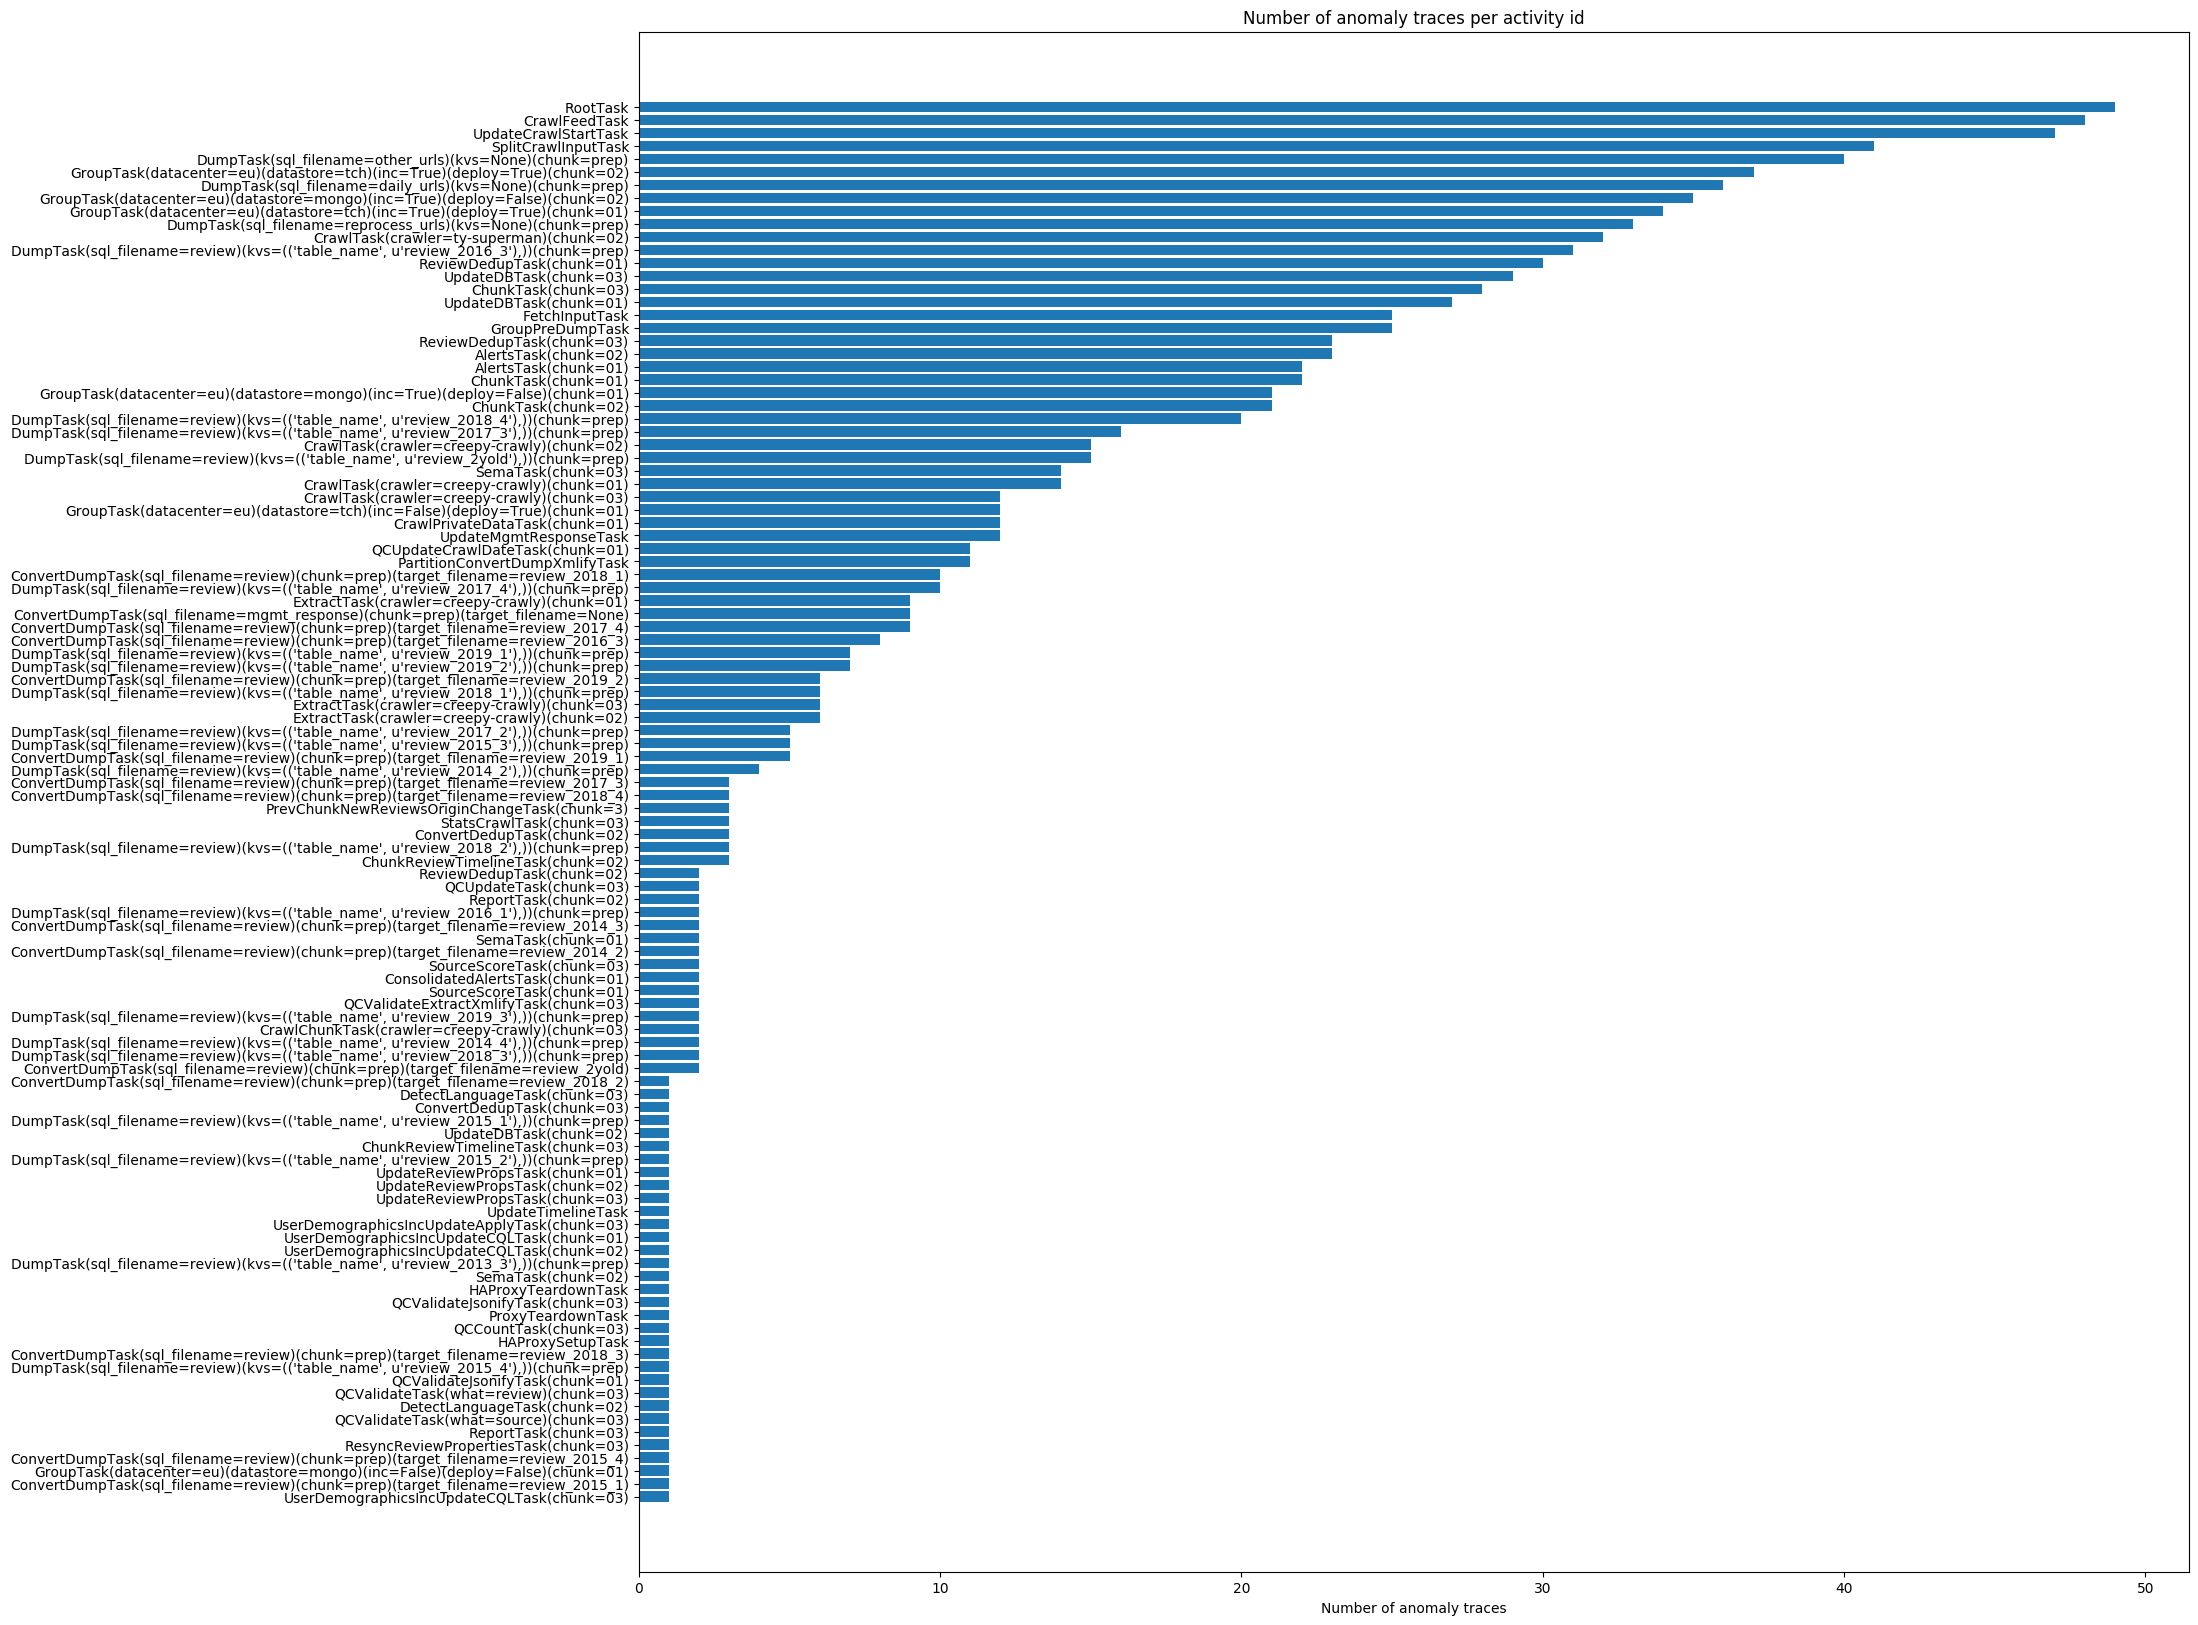

In [44]:
threshold_histogram(activity_evaluated, bucket='activity', anomaly_name='number_of_anomalies', x_axis_name='Number of anomaly traces')

#output_path = LUIGI_LOG_PATH+'/../../graphs/allDataAtOnce/daily.2019-0709_three_months_anomaly_threshold_num_activity_trace_anomaly_traces.png'
#plt.savefig(output_path,  bbox_inches='tight')

In [45]:
extreme_anomalies = activity_evaluated[activity_evaluated['number_of_anomalies']>=1].sort_values(by='number_of_anomalies').tail(1)
#print(extreme_anomalies[['average','std','lower_bound','upper_bound']])
print('The following anomalies were found:')
anomaly_activity_id = extreme_anomalies['activity'].values[0]
anomaly_case_id = extreme_anomalies['anomaly_traces'].values[0]
print(anomaly_case_id, 'for')
suspects_stats = activity_candidates[activity_candidates['activity'].isin([anomaly_activity_id])]
suspects_stats.head()

The following anomalies were found:
['daily.2019-07-21_09-53-01' 'daily.2019-08-25_03-39-01'
 'daily.2019-08-23_12-17-02' 'daily.2019-08-21_18-17-01'
 'daily.2019-08-20_00-31-01' 'daily.2019-08-18_04-58-02'
 'daily.2019-08-16_10-37-01' 'daily.2019-08-14_14-19-01'
 'daily.2019-08-12_22-10-01' 'daily.2019-08-11_05-05-01'
 'daily.2019-08-09_12-44-01' 'daily.2019-08-07_09-18-01'
 'daily.2019-08-05_12-43-01' 'daily.2019-08-03_20-09-01'
 'daily.2019-08-02_01-58-01' 'daily.2019-07-31_08-38-01'
 'daily.2019-07-29_16-03-01' 'daily.2019-07-28_01-20-01'
 'daily.2019-07-26_09-07-01' 'daily.2019-07-24_17-03-01'
 'daily.2019-08-26_20-10-01' 'daily.2019-08-28_20-16-01'
 'daily.2019-08-30_13-45-01' 'daily.2019-09-20_12-49-01'
 'daily.2019-09-22_07-40-01' 'daily.2019-09-18_14-08-01'
 'daily.2019-09-01_09-29-01' 'daily.2019-09-16_19-44-01'
 'daily.2019-09-15_01-41-01' 'daily.2019-09-13_04-11-01'
 'daily.2019-09-11_05-40-02' 'daily.2019-09-09_01-34-02'
 'daily.2019-09-06_20-34-01' 'daily.2019-09-04_23-23

index  activity  avg       std  lower_bound  upper_bound
87  87     RootTask  0    0.141421 -0.141421     0.141421

In [46]:
# Preparing anomaly to be plotted:

cases_to_plot = [anomaly_case_id.tolist()[0]]
cases_to_plot.append('Average Skyline')
print("- Cases to be plotted:",cases_to_plot)

#skyline_pointsdraw_skylines=t.get_skyline_points(subset)
anomaly_suspects = skyline_points[skyline_points['case'].isin(cases_to_plot)]
print('- Number of activities in suspect skyline:',len(anomaly_suspects['activity'].unique()))

average_trace_activities = pt.get_data_selection_avgtrace(pt.get_relative_timestamps(subset)).sort_values(by=['num_start'])
average_trace_activities= pt.get_skyline_points(average_trace_activities)
print('- Number of activities in average trace:',len(average_skyline_activities))
print('- Number of activities in average trace but not in anomaly skyline:',len(average_trace_activities[~average_trace_activities['activity'].isin(anomaly_suspects['activity'].unique())]))


#average_trace_activities[average_trace_activities['activity'].isin(anomaly_suspects['activity'].unique())]
#print(len(average_skyline_activities['activity'].unique()))


anomaly_suspects_and_average = pd.concat([anomaly_suspects, average_trace_activities[['num_start','num_end','activity','case']]], ignore_index=True)                                          
suspects_and_average=anomaly_suspects_and_average.copy()
print("- Number of events to be plotted:",len(anomaly_suspects_and_average))

average_skyline_activities.head()

- Cases to be plotted: ['daily.2019-07-21_09-53-01', 'Average Skyline']
- Number of activities in suspect skyline: 35
- Number of activities in average trace: 40
- Number of activities in average trace but not in anomaly skyline: 40
- Number of events to be plotted: 134


activity average_start  \
1  CrawlFeedTask                                                00:00:00       
0  DumpTask(sql_filename=regular_urls)(kvs=None)(chunk=prep)    00:00:07       
5  DumpTask(sql_filename=daily_urls)(kvs=None)(chunk=prep)      00:00:12       
2  ProxySetupTask                                               00:00:17       
3  DumpTask(sql_filename=reprocess_urls)(kvs=None)(chunk=prep)  00:00:19       

  average_end  num_start      num_end          case   std_num_end  
1  00:19:08    0.040000   1148.380000  Average Case  0.000000e+00  
0  00:25:05    7.220000   1505.400000  Average Case  4.593642e-13  
5  00:01:30    12.920000  90.020000    Average Case  2.871026e-14  
2  00:13:22    17.745098  802.117647   Average Case  1.148181e-13  
3  00:00:59    19.460000  59.120000    Average Case  7.177566e-15

In [47]:
#output_path = LUIGI_LOG_PATH+'/../../graphs/allDataAtOnce/daily.2019-0709_three_months_anomaly_num_activity_trace_anomaly_traces_example.png'
some_plot = pt.plot_all_traces(suspects_and_average, draw_skylines=1)#, output_path=output_path
some_plot = plot_star_from_point(some_plot, average_trace_activities, anomaly_suspects, anomaly_name='skyline_points_in_case')
#some_plot.savefig(output_path,  bbox_inches='tight')

## What set of activities are expected to appear on the skyline? 

* What activities are commonly on the skyline? 
* What traces deviate? and why?
* Frequent pattern mining for skyline activities? 
* Can we predict what activities will be on the skyline?

In [48]:
all_by_activity = subset.groupby('activity').size().reset_index(name='total_points_in_activity').sort_values(by=['total_points_in_activity'], ascending=False)
skyline_by_activity = skyline_points.groupby('activity').size().reset_index(name='points_in_skyline').sort_values(by=['points_in_skyline'], ascending=False)
r_by_activity = representative.groupby('activity').size().reset_index(name='cases_in_skyline').sort_values(by=['cases_in_skyline'], ascending=False)
by_activity = r_by_activity.merge(skyline_by_activity, on='activity')
#by_activity = by_activity.merge(all_by_activity, on='activity')
#all_by_activity.plot.hist(bins=16, alpha=0.5)

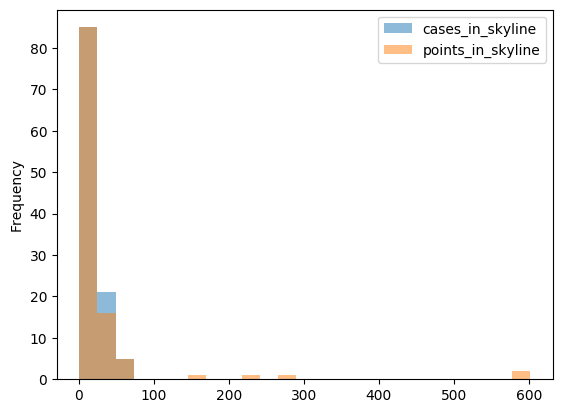

In [49]:
by_activity.plot.hist(bins=25, alpha=0.5, )

In [50]:
merged_by_activity = by_activity.merge(all_by_activity)[['activity','total_points_in_activity','points_in_skyline', 'cases_in_skyline']].sort_values(by=['total_points_in_activity'], ascending=False)
#merged_by_activity['skyline_percentage'] = round(merged_by_activity.apply(lambda row: row['points_in_skyline']/row['total_points_in_activity']*100, axis=1),2)

total_diffferent_cases= len(subset['case'].unique())
total_points_in_skyline = merged_by_activity['points_in_skyline'].sum()

merged_by_activity['probability_activity_in_skyline']=round(merged_by_activity.apply(lambda row: row['cases_in_skyline']/total_diffferent_cases*100, axis=1),2)
#merged_by_activity['prob_skyline_appearance']=round(merged_by_activity.apply(lambda row: row['points_in_skyline']/(total_points_in_skyline/total_diffferent_cases)*100, axis=1),2)
print(len(merged_by_activity))
merged_by_activity = merged_by_activity.sort_values(by='probability_activity_in_skyline', ascending=False)
merged_by_activity.head(6)

111


activity  \
1  CrawlTask(crawler=creepy-crawly)(chunk=01)                                     
3  ProxySetupTask                                                                 
0  DumpTask(sql_filename=regular_urls)(kvs=None)(chunk=prep)                      
2  DumpTask(sql_filename=mgmt_response)(kvs=None)(chunk=prep)                     
4  CrawlTask(crawler=creepy-crawly)(chunk=03)                                     
5  GroupTask(datacenter=eu)(datastore=mongo)(inc=False)(deploy=False)(chunk=01)   

   total_points_in_activity  points_in_skyline  cases_in_skyline  \
1  12020                     601                50                 
3  51                        50                 50                 
0  50                        50                 50                 
2  50                        50                 50                 
4  6909                      602                50                 
5  52                        50                 49                 

   probability_activity_in_skyline  
1  100.0                            
3  100.0                            
0  100.0                            
2  100.0                            
4  100.0                            
5  98.0

In [51]:
import matplotlib.pyplot as plt
import numpy as np 
from matplotlib.ticker import FuncFormatter

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(20, 20))

# Example data
people = merged_by_activity['activity']
y_pos = np.arange(len(people))
performance = merged_by_activity['probability_activity_in_skyline']
error = 0

def millions(x, pos):
    'The two args are the value and tick position'
    return '%11.1i'% (x)+'%' 


formatter = FuncFormatter(millions)

ax.barh(y_pos, performance, xerr=error, align='center')
ax.xaxis.set_major_formatter(formatter)
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Probability')
ax.set_title('Probability of activity belonging to skyline')

#output_path = LUIGI_LOG_PATH+'/../../graphs/allDataAtOnce/daily.2019-0709_three_months_anomaly_probabilities_activity_set.png'
#plt.savefig(output_path,  bbox_inches='tight')
plt.show()

In [52]:
#anomaly_number_of_events_skyline_results = get_anomaly_results(merged_by_activity, std_factors=[ 1.5**x for x in range(8)], anomaly_name='probability_activity_in_skyline', bucket='activity')

#output_path = LUIGI_LOG_PATH+'/../../graphs/allDataAtOnce/daily.2019-0709_three_months_anomaly_results_num_events_skyline.csv'
#anomaly_number_of_events_skyline_results.to_csv(output_path, index = None, header=True)
#anomaly_number_of_events_skyline_results

In [53]:
not_in_all_cases = all_by_activity[all_by_activity['total_points_in_activity']<13]['activity'].values.tolist()
print(len(not_in_all_cases),'/',len(all_by_activity['activity'].unique()),' activities do not appear on every trace')

MIN_APPEARANCE_PROBABILITY=95.00
expected_in_case = merged_by_activity[merged_by_activity['probability_activity_in_skyline']>MIN_APPEARANCE_PROBABILITY]['activity'].values.tolist()

print(len(expected_in_case),'/',len(all_by_activity['activity'].unique()), 'activitties have a probability of ',MIN_APPEARANCE_PROBABILITY, 'or higher of appearing on the skyline:\n')
#print(expected_in_case)
#subset[(subset['case']=='daily.2019-09-24_05-05-02.csv') & (subset['activity'].isin(lessthan))]

8 / 261  activities do not appear on every trace
9 / 261 activitties have a probability of  95.0 or higher of appearing on the skyline:



In [54]:
subest = skyline_points[skyline_points['case']=='daily.2019-08-21_18-17-01.csv']
#print(set(subest['activity'].unique()))
print(set(expected_in_case) - set(subest['activity'].unique()))

{'ExtractTask(crawler=creepy-crawly)(chunk=03)', 'GroupTask(datacenter=eu)(datastore=mongo)(inc=False)(deploy=False)(chunk=01)', 'DumpTask(sql_filename=regular_urls)(kvs=None)(chunk=prep)', 'CrawlTask(crawler=creepy-crawly)(chunk=03)', 'ProxySetupTask', 'CrawlTask(crawler=creepy-crawly)(chunk=01)', 'CrawlFeedTask', 'RootTask', 'DumpTask(sql_filename=mgmt_response)(kvs=None)(chunk=prep)'}


In [55]:
suspects_expected_activities_not_found = []
for ucase in skyline_points['case'].unique(): 
    activities = skyline_points[skyline_points['case']==ucase]['activity'].unique()
    if not set(expected_in_case) <= set(activities): 
        #print(ucase, set(expected_in_case) - set(activities))
        suspects_expected_activities_not_found.append(ucase)
        
print(len(suspects_expected_activities_not_found))

4


In [56]:
skyline_average = pt.get_data_selection_avgtrace(skyline_points)
skyline_average = skyline_average[['num_start', 'num_end', 'activity', 'case', 'std_num_end']]
skyline_average.head()
#pt.plot_all_traces(skyline_average)

num_start      num_end  \
30  739.388889  1604.916667   
4   740.454545  1628.242424   
2   741.645833  2051.166667   
3   742.720000  1973.760000   
1   743.950000  1882.825000   

                                                       activity          case  \
30  DumpTask(sql_filename=daily_urls)(kvs=None)(chunk=prep)      Average Case   
4   DumpTask(sql_filename=reprocess_urls)(kvs=None)(chunk=prep)  Average Case   
2   CrawlFeedTask                                                Average Case   
3   ProxySetupTask                                               Average Case   
1   DumpTask(sql_filename=other_urls)(kvs=None)(chunk=prep)      Average Case   

     std_num_end  
30  2.305990e-13  
4   0.000000e+00  
2   0.000000e+00  
3   2.296821e-13  
1   0.000000e+00

In [57]:
# Anomaly expected activity not found
#print(suspects_and_average['case'].unique())
two_cases=suspects_expected_activities_not_found[0:3]
#two_cases = list(set(suspect_duration['case'].unique()).intersection(suspects_intersection))[0:3]

activities_to_plot = suspects_and_average[suspects_and_average['case'].isin(two_cases)]['activity'].unique()
activities_to_plot = merged_by_activity['activity'].unique()
activities_to_plot = expected_in_case
#print(len(activities_to_plot)) 


skyline_average = pt.get_data_selection_avgtrace(skyline_points)
#average_skyline['case']='Average Skyline'

two_cases.append('Average Case')
print(two_cases)
two_cases=['daily.2019-09-01_09-29-01.csv']
data = suspects_and_average[suspects_and_average['case'].isin(two_cases)]
print(len(data))
data = data.append(skyline_average)
print(data.columns)    
two_cases.append('Average Case')
print(two_cases)
snippet=data[data['case'].isin(two_cases)&data['activity'].isin(activities_to_plot)]


skyline_plot= pt.plot_all_traces(snippet=snippet, show_plot=None)
some_plot= plot_star_from_point(skyline_plot, skyline_average[skyline_average['activity'].isin(activities_to_plot)], data[data['case'].isin(two_cases)], anomaly_name='activity_set')

#output_path=LUIGI_LOG_PATH+'graphs/avgActSlideSplit/param_catts_daily.2019-09-All_21_50act_390pts_skyline_activity_set_anomaly.png'
#some_plot.savefig(output_path,  bbox_inches='tight')

['daily.2019-07-01_10-28-01', 'daily.2019-07-15_07-34-01', 'daily.2019-09-04_23-23-01', 'Average Case']
0
Index(['num_start', 'num_end', 'activity', 'case', 'average_start',
       'average_end', 'std_num_end'],
      dtype='object')
['daily.2019-09-01_09-29-01.csv', 'Average Case']


## WIP: Anomaly of Unexpect Number of Events per Activity on Skyline
- Percentage of skyline points per case deviation.
- Percentage of points on skyline per activities per case, compare to average for certain activity.

Ideas for anomaly detection using number of points in skyline and case:
- Anomaly if for any activity: it appears less times than there is cases.
- Anomaly if any case deviates strongly in number of total points
- Anomaly Detection through deviation of average. Overlapp of deviation on cases and activities per case could be helpful.

To continue: Create an expected skyline that does not average over activities but takes activity appereances into regard, so that two events with the same activity name in a trace are averaged to different activities in the expected skyline

In [58]:
#pt.plot_all_traces(snippet=skyline_points[skyline_points['case'].isin(case_selection)], draw_skylines=1, show_plot=1)
#subset.head()
#pt.plot_all_traces(snippet=subset, draw_skylines=1, show_plot=1)
#pt.plot_average_trace(snippet=skyline_points, draw_skylines=1, show_plot=1)

In [59]:
def plot_star_from_point(s_plot, reference_points, body_points):
    axis = s_plot.get_axes()
    #average_skyline = pt.get_skyline_points(body_points)
    average_skyline = body_points
    axis[0].plot(average_skyline['num_start'],average_skyline['num_end'],color='green')
    return s_plot

    for index, reference_point in reference_points.iterrows(): 
        for jndex, point in body_points[body_points['activity']==reference_point['activity']].iterrows():
            x = []
            y = []
            x.append(reference_point['num_start'])
            x.append(point['num_start'])
            y.append(reference_point['num_end'])
            y.append(point['num_end'])
            axis[0].plot(x,y,color='black', linewidth=0.5)

    
    #skyline_plot.show()
    return s_plot

In [60]:
by_case_activity = skyline_points.groupby(['activity', 'case']).size().reset_index(name='total_points_in_case').sort_values(by=['total_points_in_case'], ascending=False)
by_case_activity= by_case_activity.pivot(index='activity', columns='case', values='total_points_in_case').reset_index()
by_case_activity=by_case_activity.set_index('activity')
# Select any row where any column fullfills any condition:
mask = by_case_activity.applymap(lambda x: x>1)
candidates = by_case_activity[mask.any(axis=1)]
#candidates = candidates.fillna(0)
candidates




case                                                                          daily.2019-07-01_10-28-01  \
activity                                                                                                  
CrawlTask(crawler=creepy-crawly)(chunk=01)                                    8.0                         
CrawlTask(crawler=creepy-crawly)(chunk=02)                                    4.0                         
CrawlTask(crawler=creepy-crawly)(chunk=03)                                    3.0                         
ExtractTask(crawler=creepy-crawly)(chunk=01)                                  1.0                         
ExtractTask(crawler=creepy-crawly)(chunk=02)                                  2.0                         
ExtractTask(crawler=creepy-crawly)(chunk=03)                                 NaN                          
GroupTask(datacenter=eu)(datastore=mongo)(inc=False)(deploy=False)(chunk=01)  1.0                         
GroupTask(datacenter=eu)(datastore=tch)(inc=True)(deploy=True)(chunk=02)      1.0                         

case                                                                          daily.2019-07-03_00-21-01  \
activity                                                                                                  
CrawlTask(crawler=creepy-crawly)(chunk=01)                                    8.0                         
CrawlTask(crawler=creepy-crawly)(chunk=02)                                    4.0                         
CrawlTask(crawler=creepy-crawly)(chunk=03)                                    4.0                         
ExtractTask(crawler=creepy-crawly)(chunk=01)                                  3.0                         
ExtractTask(crawler=creepy-crawly)(chunk=02)                                  3.0                         
ExtractTask(crawler=creepy-crawly)(chunk=03)                                  4.0                         
GroupTask(datacenter=eu)(datastore=mongo)(inc=False)(deploy=False)(chunk=01)  1.0                         
GroupTask(datacenter=eu)(datastore=tch)(inc=True)(deploy=True)(chunk=02)     NaN                          

case                                                                          daily.2019-07-04_14-27-01  \
activity                                                                                                  
CrawlTask(crawler=creepy-crawly)(chunk=01)                                    6.0                         
CrawlTask(crawler=creepy-crawly)(chunk=02)                                    7.0                         
CrawlTask(crawler=creepy-crawly)(chunk=03)                                    10.0                        
ExtractTask(crawler=creepy-crawly)(chunk=01)                                  1.0                         
ExtractTask(crawler=creepy-crawly)(chunk=02)                                  1.0                         
ExtractTask(crawler=creepy-crawly)(chunk=03)                                  6.0                         
GroupTask(datacenter=eu)(datastore=mongo)(inc=False)(deploy=False)(chunk=01)  1.0                         
GroupTask(datacenter=eu)(datastore=tch)(inc=True)(deploy=True)(chunk=02)      1.0                         

case                                                                          daily.2019-07-06_03-28-02  \
activity                                                                                                  
CrawlTask(crawler=creepy-crawly)(chunk=01)                                    12.0                        
CrawlTask(crawler=creepy-crawly)(chunk=02)                                    4.0                         
CrawlTask(crawler=creepy-crawly)(chunk=03)                                    21.0                        
ExtractTask(crawler=creepy-crawly)(chunk=01)                                  1.0                         
ExtractTask(crawler=creepy-crawly)(chunk=02)                                  3.0                         
ExtractTask(crawler=creepy-crawly)(chu

In [61]:
stats_case_activity = pd.DataFrame()
stats_case_activity['avg']=by_case_activity.mean(axis=1).apply(math.floor)
stats_case_activity['stddev']=by_case_activity.std(axis=1)
stats_case_activity['lower_bound']=stats_case_activity.apply(lambda row: row['avg']-row['stddev'], axis=1)
stats_case_activity['upper_bound']=stats_case_activity.apply(lambda row: row['avg']+row['stddev'], axis=1)
#stats_case_activity[stats_case_activity['stddev']>0]
stats_case_activity.sort_values(by='stddev', ascending=False).head(15)


#
#TODO: Anomaly detection when any row exceeds lower or upper bound from stats.

avg  \
activity                                                                            
CrawlTask(crawler=creepy-crawly)(chunk=03)                                    12    
CrawlTask(crawler=creepy-crawly)(chunk=01)                                    12    
ExtractTask(crawler=creepy-crawly)(chunk=03)                                  5     
CrawlTask(crawler=creepy-crawly)(chunk=02)                                    4     
ExtractTask(crawler=creepy-crawly)(chunk=01)                                  3     
ExtractTask(crawler=creepy-crawly)(chunk=02)                                  1     
GroupTask(datacenter=eu)(datastore=tch)(inc=True)(deploy=True)(chunk=02)      1     
GroupTask(datacenter=eu)(datastore=mongo)(inc=False)(deploy=False)(chunk=01)  1     
GroupTask(datacenter=eu)(datastore=mongo)(inc=True)(deploy=False)(chunk=01)   1     
GroupTask(datacenter=eu)(datastore=tch)(inc=True)(deploy=True)(chunk=01)      1     
GroupTask(datacenter=eu)(datastore=tch)(inc=False)(deploy=True)(chunk=01)     1     
GroupTask(datacenter=eu)(datastore=mongo)(inc=True)(deploy=False)(chunk=02)   1     
AlertsTask(chunk=01)                                                          1     
PartitionConvertDumpXmlifyTask                                                1     
FetchInputTask                                                                1     

                                                                                stddev  \
activity                                                                                 
CrawlTask(crawler=creepy-crawly)(chunk=03)                                    7.018809   
CrawlTask(crawler=creepy-crawly)(chunk=01)                                    4.930083   
ExtractTask(crawler=creepy-crawly)(chunk=03)                                  4.219226   
CrawlTask(crawler=creepy-crawly)(chunk=02)                                    2.417367   
ExtractTask(crawler=creepy-crawly)(chunk=01)                                  2.348460   
ExtractTask(crawler=creepy-crawly)(chunk=02)                                  0.851351   
GroupTask(datacenter=eu)(datastore=tch)(inc=True)(deploy=True)(chunk=02)      0.164399   
GroupTask(datacenter=eu)(datastore=mongo)(inc=False)(deploy=False)(chunk=01)  0.142857   
GroupTask(datacenter=eu)(datastore=mongo)(inc=True)(deploy=False)(chunk=01)   0.000000   
GroupTask(datacenter=eu)(datastore=tch)(inc=True)(deploy=True)(chunk=01)      0.000000   
GroupTask(datacenter=eu)(datastore=tch)(inc=False)(deploy=True)(chunk=01)     0.000000   
GroupTask(datacenter=eu)(datastore=mongo)(inc=True)(deploy=False)(chunk=02)   0.000000   
AlertsTask(chunk=01)                                                          0.000000   
PartitionConvertDumpXmlifyTask                                                0.000000   
FetchInputTask                                                                0.000000   

                                                                              lower_bound  \
activity                                                                                    
CrawlTask(crawler=creepy-crawly)(chunk=03)                                    4.981191      
CrawlTask(crawler=creepy-crawly)(chunk=01)                                    7.069917      
ExtractTask(crawler=creepy-crawly)(chunk=03)                                  0.780774      
CrawlTask(crawler=creepy-crawly)(chunk=02)                                    1.582633      
ExtractTask(crawler=creepy-crawly)(chunk=01)                                  0.651540      
ExtractTask(crawler=creepy-crawly)(chunk=02)                                  0.148649      
GroupTask(datacenter=eu)(datastore=tch)(inc=True)(deploy=True)(chunk=02)      0.835601      
GroupTask(datacenter=eu)(datastore=mongo)(inc=False)(deploy=False)(chunk=01)  0.857143      
GroupTask(datacenter=eu)(datastore=mongo)(inc=True)(deploy=False)(chunk=01)   1.000000      
GroupTask(datacenter=eu)(datastore=tch)(inc=True)(deploy=True)(chunk=01)      

In [62]:
skyline_points = pt.get_skyline_points(subset)
print(skyline_points['case'].unique())
case_selection = ['daily.2019-09-03_03-44-01.csv','Expected Skyline']

expected = skyline_points[skyline_points['case']=='daily.2019-09-04_23-23-01.csv'].loc[:]
print(len(expected))
expected['case'] ='Expected Skyline'

anomaly = skyline_points[skyline_points['case']=='daily.2019-09-03_03-44-01.csv'].loc[:]
print(len(anomaly))
#anomaly['case'] ='Anomaly Trace'

#case_selection = skyline_points['case'].unique()
skyline_points = anomaly.append(expected, ignore_index=True)
print(len(expected))



#skyline_plot = pt.plot_all_traces(snippet=expected[expected['case'].isin(case_selection)], draw_skylines=1, show_plot=None))
skyline_plot= pt.plot_all_traces(snippet=skyline_points[skyline_points['case'].isin(case_selection)], draw_skylines=1, show_plot=None)
some_plot= plot_star_from_point(skyline_plot, skyline_points[skyline_points['case']=='Expected Skyline'], skyline_points[skyline_points['case'].isin((set(case_selection)-set('Expected Skyline')))],anomaly_name='activity_skyline')
#plot_star_from_point(skyline_plot, skyline_points[skyline_points['case']=='Expected Skyline'], skyline_points[skyline_points['case'].isin((set(case_selection)-set('Expected Skyline')))],anomaly_name='activity_skyline')

#output_path=LUIGI_LOG_PATH+'graphs/avgActSlideSplit/param_catts_daily.2019-09-All_21_50act_390pts_number_unexpected_duration_anomaly.png'
#some_plot.savefig(output_path,  bbox_inches='tight')

No handles with labels found to put in legend.


['daily.2019-07-01_10-28-01' 'daily.2019-07-03_00-21-01'
 'daily.2019-07-04_14-27-01' 'daily.2019-07-06_03-28-02'
 'daily.2019-07-07_16-38-01' 'daily.2019-07-09_07-30-01'
 'daily.2019-07-10_19-45-01' 'daily.2019-07-12_08-18-01'
 'daily.2019-07-13_21-50-01' 'daily.2019-07-15_07-34-01'
 'daily.2019-07-16_19-14-01' 'daily.2019-07-18_05-25-01'
 'daily.2019-07-19_18-50-01' 'daily.2019-07-21_09-53-01'
 'daily.2019-07-22_23-47-01' 'daily.2019-07-24_17-03-01'
 'daily.2019-07-26_09-07-01' 'daily.2019-07-28_01-20-01'
 'daily.2019-07-29_16-03-01' 'daily.2019-07-31_08-38-01'
 'daily.2019-08-02_01-58-01' 'daily.2019-08-03_20-09-01'
 'daily.2019-08-05_12-43-01' 'daily.2019-08-07_09-18-01'
 'daily.2019-08-09_12-44-01' 'daily.2019-08-11_05-05-01'
 'daily.2019-08-12_22-10-01' 'daily.2019-08-14_14-19-01'
 'daily.2019-08-16_10-37-01' 'daily.2019-08-18_04-58-02'
 'daily.2019-08-20_00-31-01' 'daily.2019-08-21_18-17-01'
 'daily.2019-08-23_12-17-02' 'daily.2019-08-25_03-39-01'
 'daily.2019-08-26_20-10-01' 'd

TypeError: plot_star_from_point() got an unexpected keyword argument 'anomaly_name'

## Anomaly of unexpected activity duration

In [ ]:
# Anomaly of unexpected activity duration

#print(suspects_and_average['case'].unique())
two_cases=suspect_duration['case'].unique().tolist()[0:3]
#two_cases = list(set(suspect_duration['case'].unique()).intersection(suspects_intersection))[0:3]

activities_to_plot = suspects_and_average[suspects_and_average['case'].isin(two_cases)]['activity'].unique()
#print(len(activities_to_plot)) 
two_cases.append('Average Case')
two_cases = ['Average Case','daily.2019-09-04_23-23-01.csv' ]
print(two_cases)

skyline_plot= pt.plot_all_traces(snippet=suspects_and_average[suspects_and_average['case'].isin(two_cases)&suspects_and_average['activity'].isin(activities_to_plot)], draw_skylines=1, show_plot=None)
some_plot= plot_star_from_point(skyline_plot, suspects_and_average[suspects_and_average['case'].isin(two_cases)], average_trace_activities)


In [ ]:
#skyline_points.head()

suspects_intersections = skyline_points[skyline_points['case'].isin(suspects_intersection)]
#print(len(suspects_intersections['activity'].unique()))
average_skyline_activities = average_trace_activities[average_trace_activities['activity'].isin(suspects_intersections['activity'].unique())]
#print(len(average_skyline_activities['activity'].unique()))
suspects_intersection.add('Average Case')

suspects_and_average = pd.concat([skyline_points, average_skyline_activities[['num_start','num_end','activity','case', 'std_num_end']]], ignore_index=True)                                          
suspects_and_average = suspects_and_average[suspects_and_average['case'].isin(suspects_intersection)]
suspects_and_average

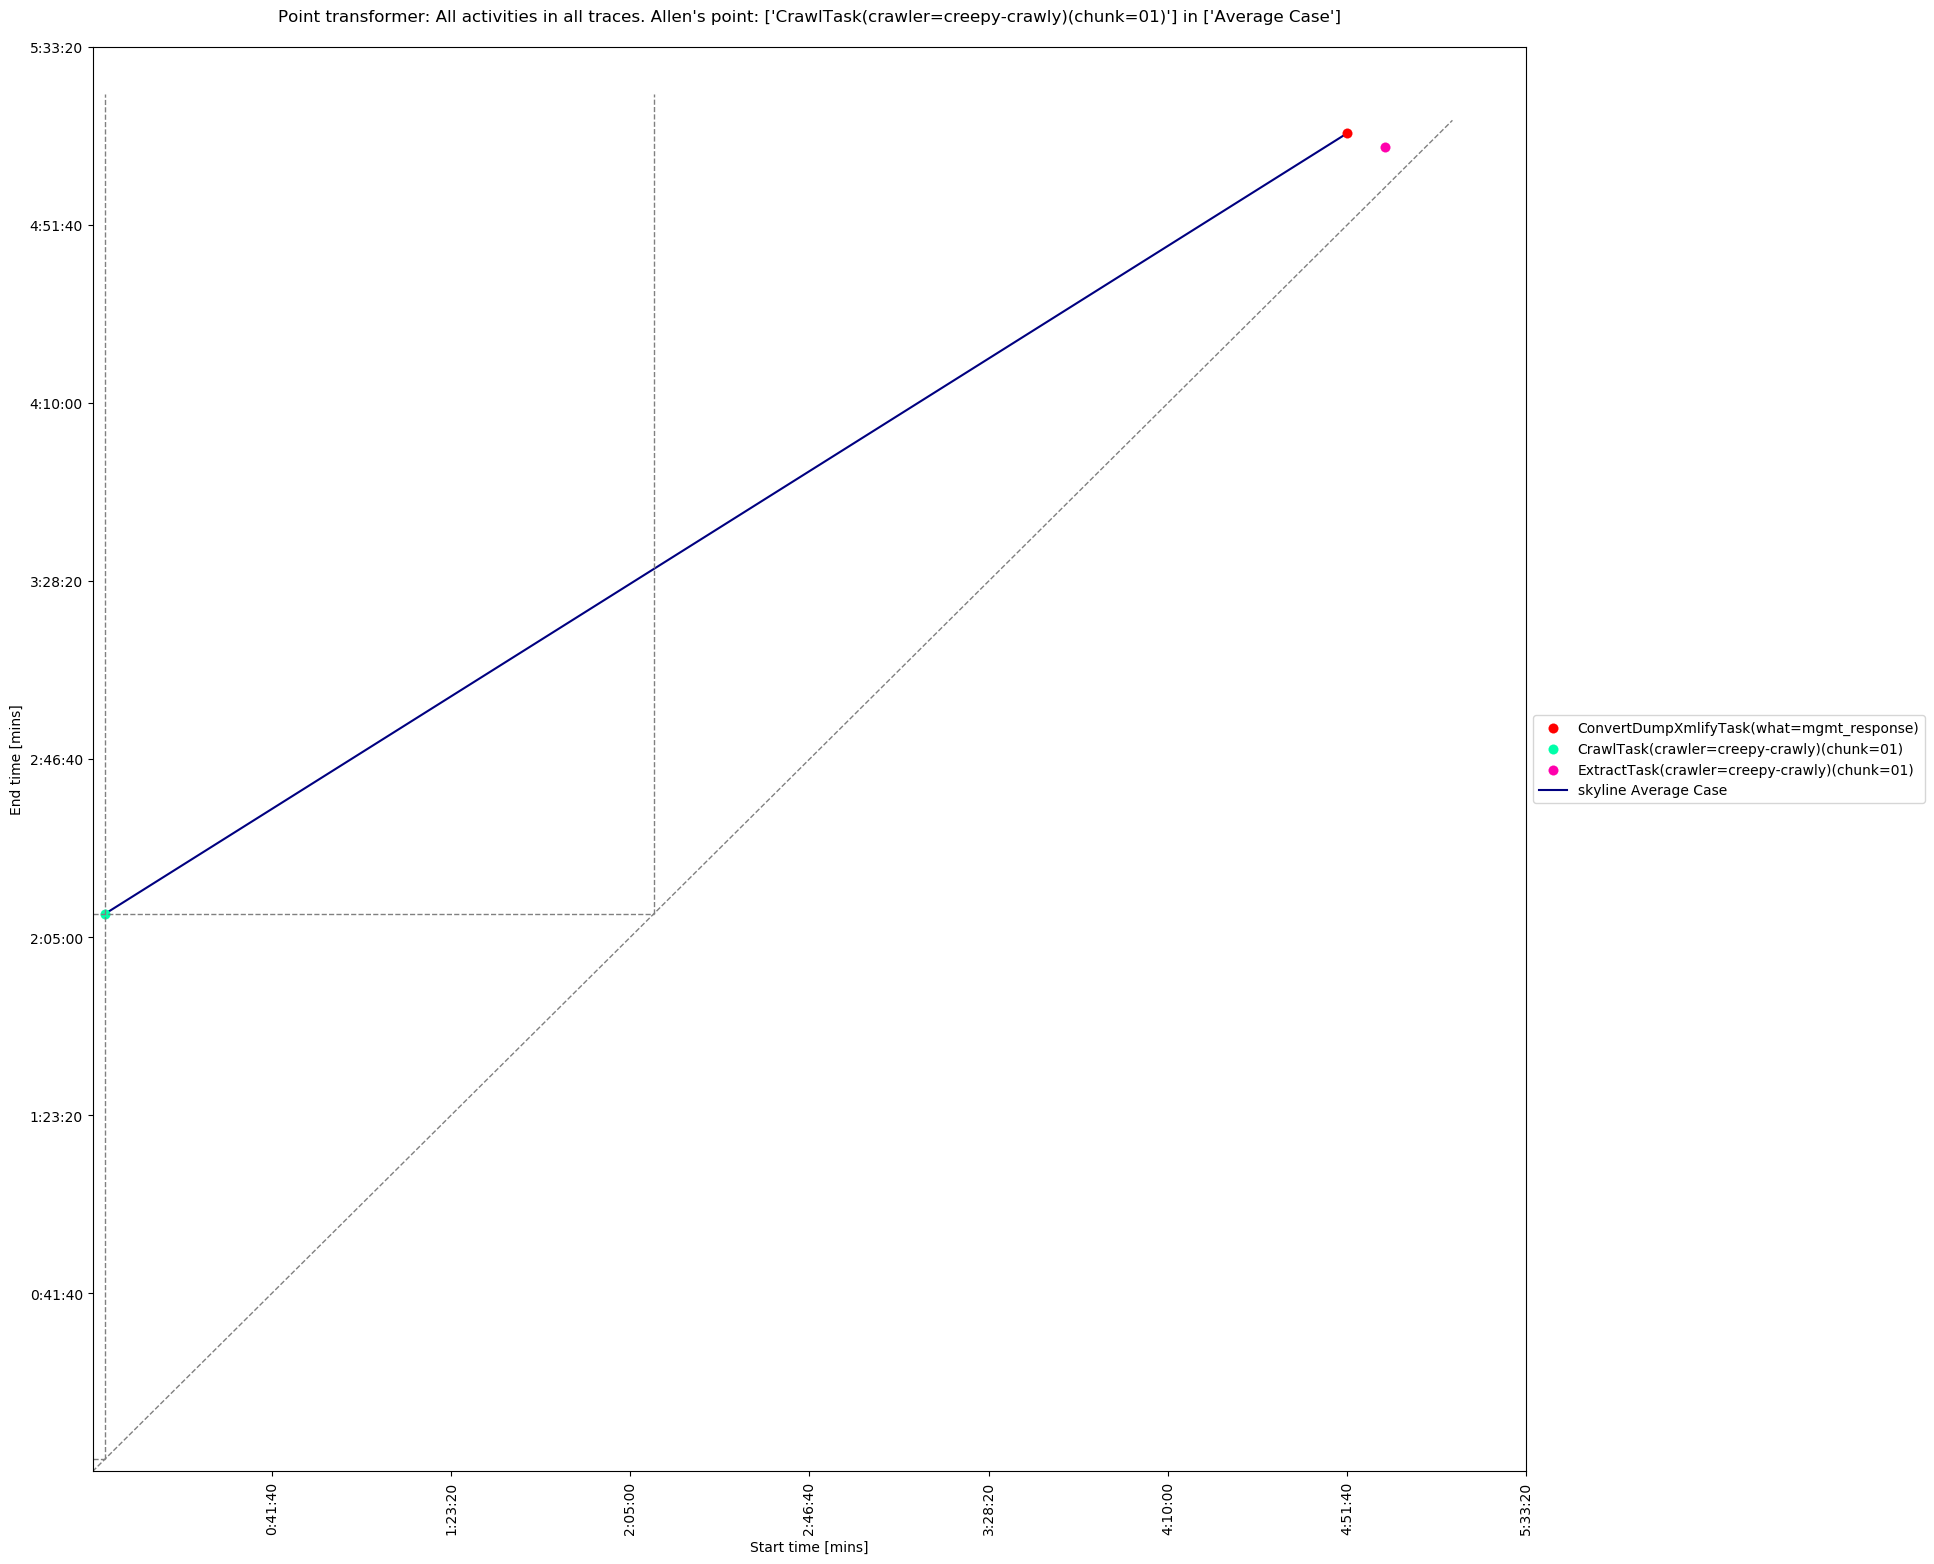

In [44]:
two_cases=['daily.2019-08-07_09-18-01', 'Average Case']
#skyline_plot= pt.plot_all_traces(snippet=suspects_and_average[suspects_and_average['case'].isin(suspects_intersection)], draw_skylines=1)
skyline_plot= pt.plot_all_traces(snippet=suspects_and_average[suspects_and_average['case'].isin(two_cases)], draw_skylines=1, show_plot=None)
#skyline_plot= pt.plot_all_traces(snippet=suspects_and_average[suspects_and_average['case']=='daily.2019-07-01_10-28-01'], draw_skylines=1)

# How to show those anomalies in graph 

In [45]:
reference_point=average_skyline.head(10)
#print(reference_point)
#plot_star_from_point(skyline_plot, average_skyline, suspects_and_average[suspects_and_average['case'].isin(two_cases)])
plot_star_from_point(skyline_plot, suspects_and_average[suspects_and_average['case'].isin(two_cases)],average_trace_activities)


NameError: name 'average_skyline' is not defined

147


array(['daily.2019-09-03_03-44-01.csv', 'Expected Skyline'], dtype=object)

In [ ]:
skyline_pointsi = skyline_points[skyline_points['case']!='anomaly']
print(len(skyline_pointsi))
skyline_pointsi.head(30)

In [49]:
pt.plot_all_traces(snippet=average_trace_activities, show_plot=None)

In [ ]:
pt.plot_all_traces(snippet=subset[subset['case'].str.startswith('daily.2019-09-04')], draw_skylines=1)

In [ ]:
for figure in plt.get_fignums():
    plt.close(figure)

In [ ]:
pt.plot_all_traces(snippet=subset[subset['case']=='daily.2019-09-01_09-29-01.csv'], draw_skylines=1, show_plot=1)


In [48]:
print(len(subset),' length of subset')

skyline_points = pt.get_skyline_points(subset)
expected = skyline_points[skyline_points['case']=='daily.2019-09-04_23-23-01.csv'].loc[:]
print(len(expected))
expected['case'] ='Expected Skyline'

skyline_points = skyline_points.append(expected, ignore_index=True)

#skyline_points = skyline_points.sort_values(by='case', ascending=False)

print(len(skyline_points), 'points on the skylines')
print(skyline_points['case'].unique())
skyline_points.head()

15708  length of subset
67
948 points on the skylines
['daily.2019-09-01_09-29-01.csv' 'daily.2019-09-03_03-44-01.csv'
 'daily.2019-09-04_23-23-01.csv' 'daily.2019-09-06_20-34-01.csv'
 'daily.2019-09-09_01-34-02.csv' 'daily.2019-09-11_05-40-02.csv'
 'daily.2019-09-13_04-11-01.csv' 'daily.2019-09-15_01-41-01.csv'
 'daily.2019-09-16_19-44-01.csv' 'daily.2019-09-18_14-08-01.csv'
 'daily.2019-09-20_12-49-01.csv' 'daily.2019-09-22_07-40-01.csv'
 'daily.2019-09-24_05-05-02.csv' 'Expected Skyline']


num_start  num_end  \
0  0.0        1141.0    
1  0.0        1607.0    
2  0.0        1607.0    
3  0.0        1607.0    
4  0.0        1607.0    

                                                                activity  \
0  CrawlFeedTask                                                           
1  DumpTask(target_filename=None)(chunk=prep)(sql_filename=regular_urls)   
2  DumpTask(target_filename=None)(chunk=prep)(sql_filename=other_urls)     
3  DumpTask(target_filename=None)(chunk=prep)(sql_filename=daily_urls)     
4  ProxySetupTask                                                          

                            case  
0  daily.2019-09-01_09-29-01.csv  
1  daily.2019-09-01_09-29-01.csv  
2  daily.2019-09-01_09-29-01.csv  
3  daily.2019-09-01_09-29-01.csv  
4  daily.2019-09-01_09-29-01.csv

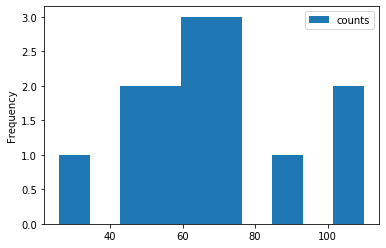

In [49]:
by_case = skyline_points.groupby('case').size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)
by_case.plot.hist()

In [50]:
by_case

case  counts
4   daily.2019-09-06_20-34-01.csv  110   
5   daily.2019-09-09_01-34-02.csv  107   
8   daily.2019-09-15_01-41-01.csv  92    
2   daily.2019-09-03_03-44-01.csv  75    
7   daily.2019-09-13_04-11-01.csv  72    
12  daily.2019-09-22_07-40-01.csv  69    
0   Expected Skyline               67    
3   daily.2019-09-04_23-23-01.csv  67    
10  daily.2019-09-18_14-08-01.csv  61    
9   daily.2019-09-16_19-44-01.csv  55    
1   daily.2019-09-01_09-29-01.csv  53    
11  daily.2019-09-20_12-49-01.csv  49    
6   daily.2019-09-11_05-40-02.csv  45    
13  daily.2019-09-24_05-05-02.csv  26

In [51]:
by_activity = skyline_points.groupby('activity').size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)
#print(by_activity)
by_activity.plot.hist()

In [52]:
by_activity.head()

activity  counts
23  CrawlTask(crawler=creepy-crawly)(chunk=03)    194   
21  CrawlTask(crawler=creepy-crawly)(chunk=01)    181   
45  ExtractTask(crawler=creepy-crawly)(chunk=03)  102   
22  CrawlTask(crawler=creepy-crawly)(chunk=02)    64    
43  ExtractTask(crawler=creepy-crawly)(chunk=01)  48

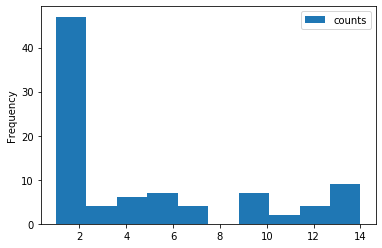

In [53]:
representative = skyline_points[['case','activity']].drop_duplicates()
r_by_activity = representative.groupby('activity').size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)
r_by_activity.plot.hist()

In [54]:
r_by_activity.head()

activity  \
45  ExtractTask(crawler=creepy-crawly)(chunk=03)                             
29  DumpTask(target_filename=None)(chunk=prep)(sql_filename=regular_urls)    
27  DumpTask(target_filename=None)(chunk=prep)(sql_filename=mgmt_response)   
23  CrawlTask(crawler=creepy-crawly)(chunk=03)                               
21  CrawlTask(crawler=creepy-crawly)(chunk=01)                               

    counts  
45  14      
29  14      
27  14      
23  14      
21  14

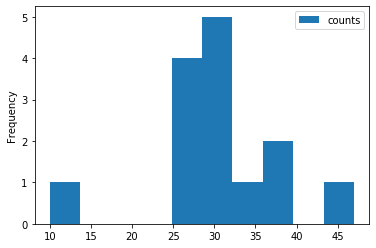

In [55]:
r_by_case = representative.groupby('case').size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)
r_by_case.plot.hist()

In [56]:
r_by_case

case  counts
5   daily.2019-09-09_01-34-02.csv  47    
4   daily.2019-09-06_20-34-01.csv  37    
10  daily.2019-09-18_14-08-01.csv  37    
8   daily.2019-09-15_01-41-01.csv  33    
2   daily.2019-09-03_03-44-01.csv  31    
6   daily.2019-09-11_05-40-02.csv  31    
7   daily.2019-09-13_04-11-01.csv  30    
9   daily.2019-09-16_19-44-01.csv  30    
12  daily.2019-09-22_07-40-01.csv  30    
1   daily.2019-09-01_09-29-01.csv  27    
0   Expected Skyline               26    
3   daily.2019-09-04_23-23-01.csv  26    
11  daily.2019-09-20_12-49-01.csv  25    
13  daily.2019-09-24_05-05-02.csv  10

In [57]:
#print(len(skyline_points), 'points are part of skylines')
unique_sk_activities = skyline_points['activity'].unique().tolist()
#print(len(unique_sk_activities), 'activities in the skyline')
skyline_points.groupby('case').size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)

activities=[]
for i, case in enumerate(skyline_points['case'].unique()):
    acts = skyline_points[skyline_points['case']==case]['activity'].unique().tolist()
    activities.append(acts)
    #print(case, len(acts))

representative = skyline_points[['case','activity']].drop_duplicates()
rep_appereances = representative.groupby(by = ['activity']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)
#rep_appereances = skyline_points.groupby(by = ['activity']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)

pd.set_option('display.max_rows', None)
print('\n',len(rep_appereances), 'Activities appear in the skyline:')
rep_appereances.head()
#rep_appereances[rep_appereances['counts']<13]

#rep_appereances.groupby(by = ['counts']).size().reset_index(name='activities').sort_values(by=['counts'], ascending=False)


 90 Activities appear in the skyline:


activity  \
45  ExtractTask(crawler=creepy-crawly)(chunk=03)                             
29  DumpTask(target_filename=None)(chunk=prep)(sql_filename=regular_urls)    
27  DumpTask(target_filename=None)(chunk=prep)(sql_filename=mgmt_response)   
23  CrawlTask(crawler=creepy-crawly)(chunk=03)                               
21  CrawlTask(crawler=creepy-crawly)(chunk=01)                               

    counts  
45  14      
29  14      
27  14      
23  14      
21  14

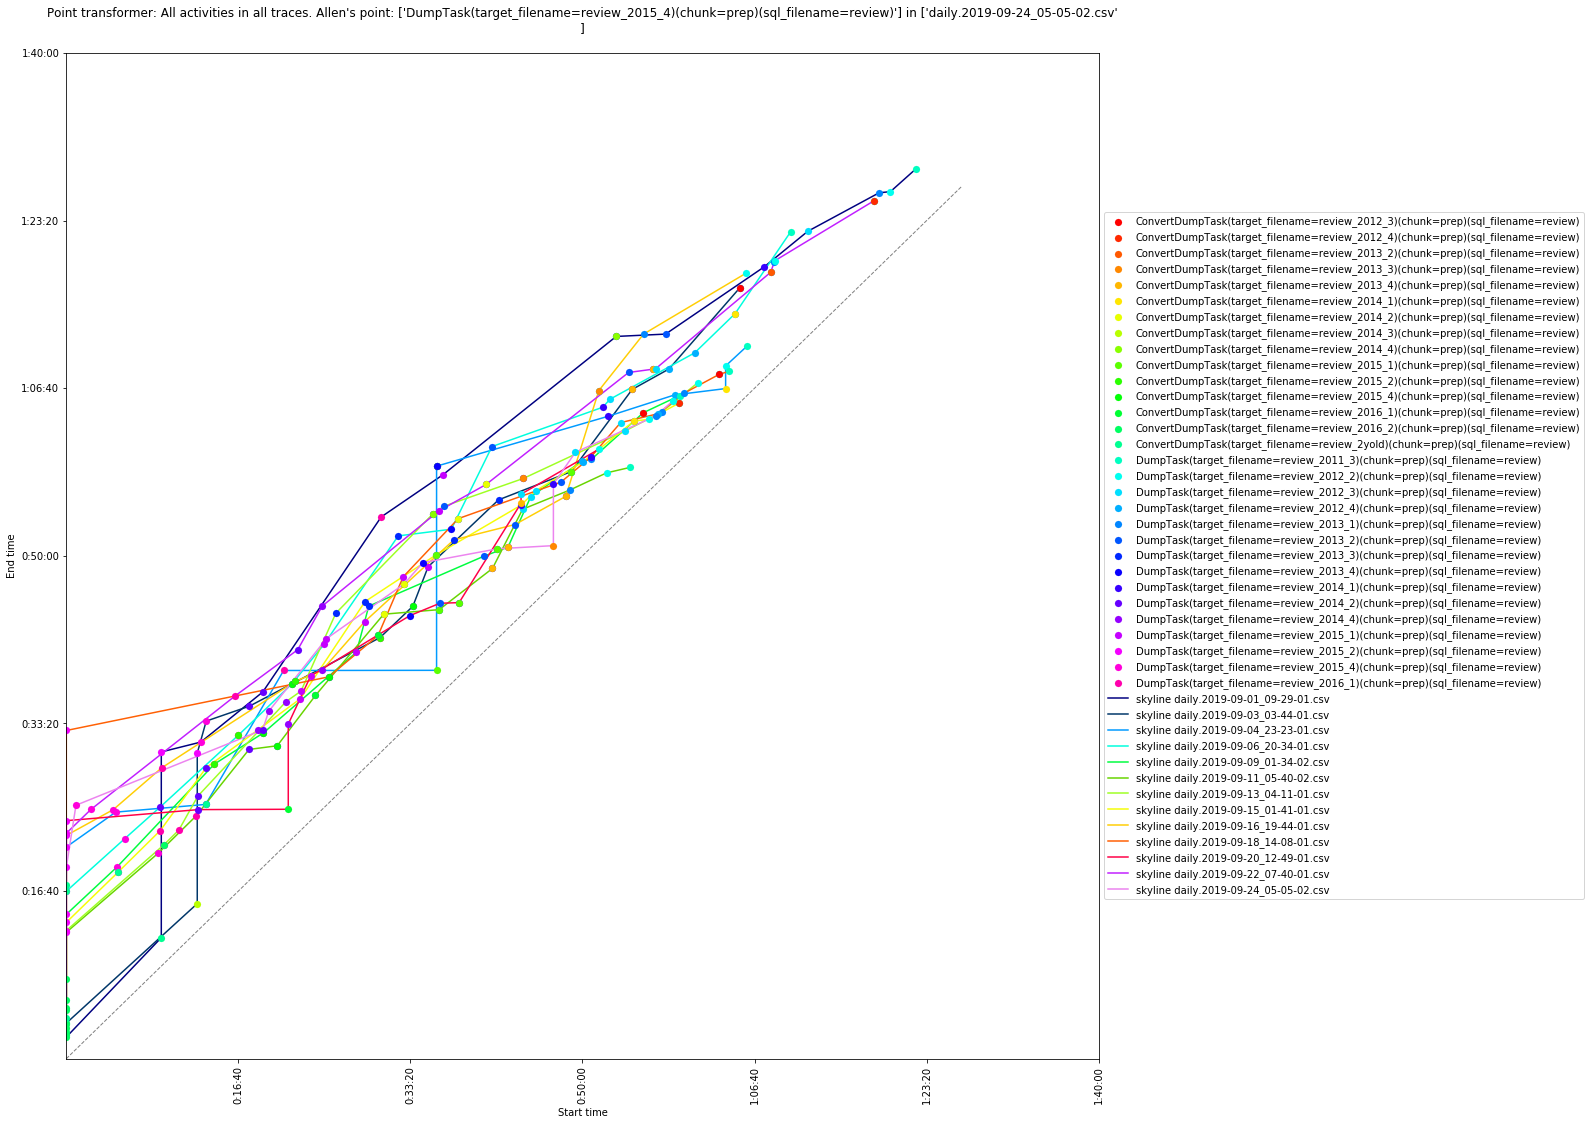

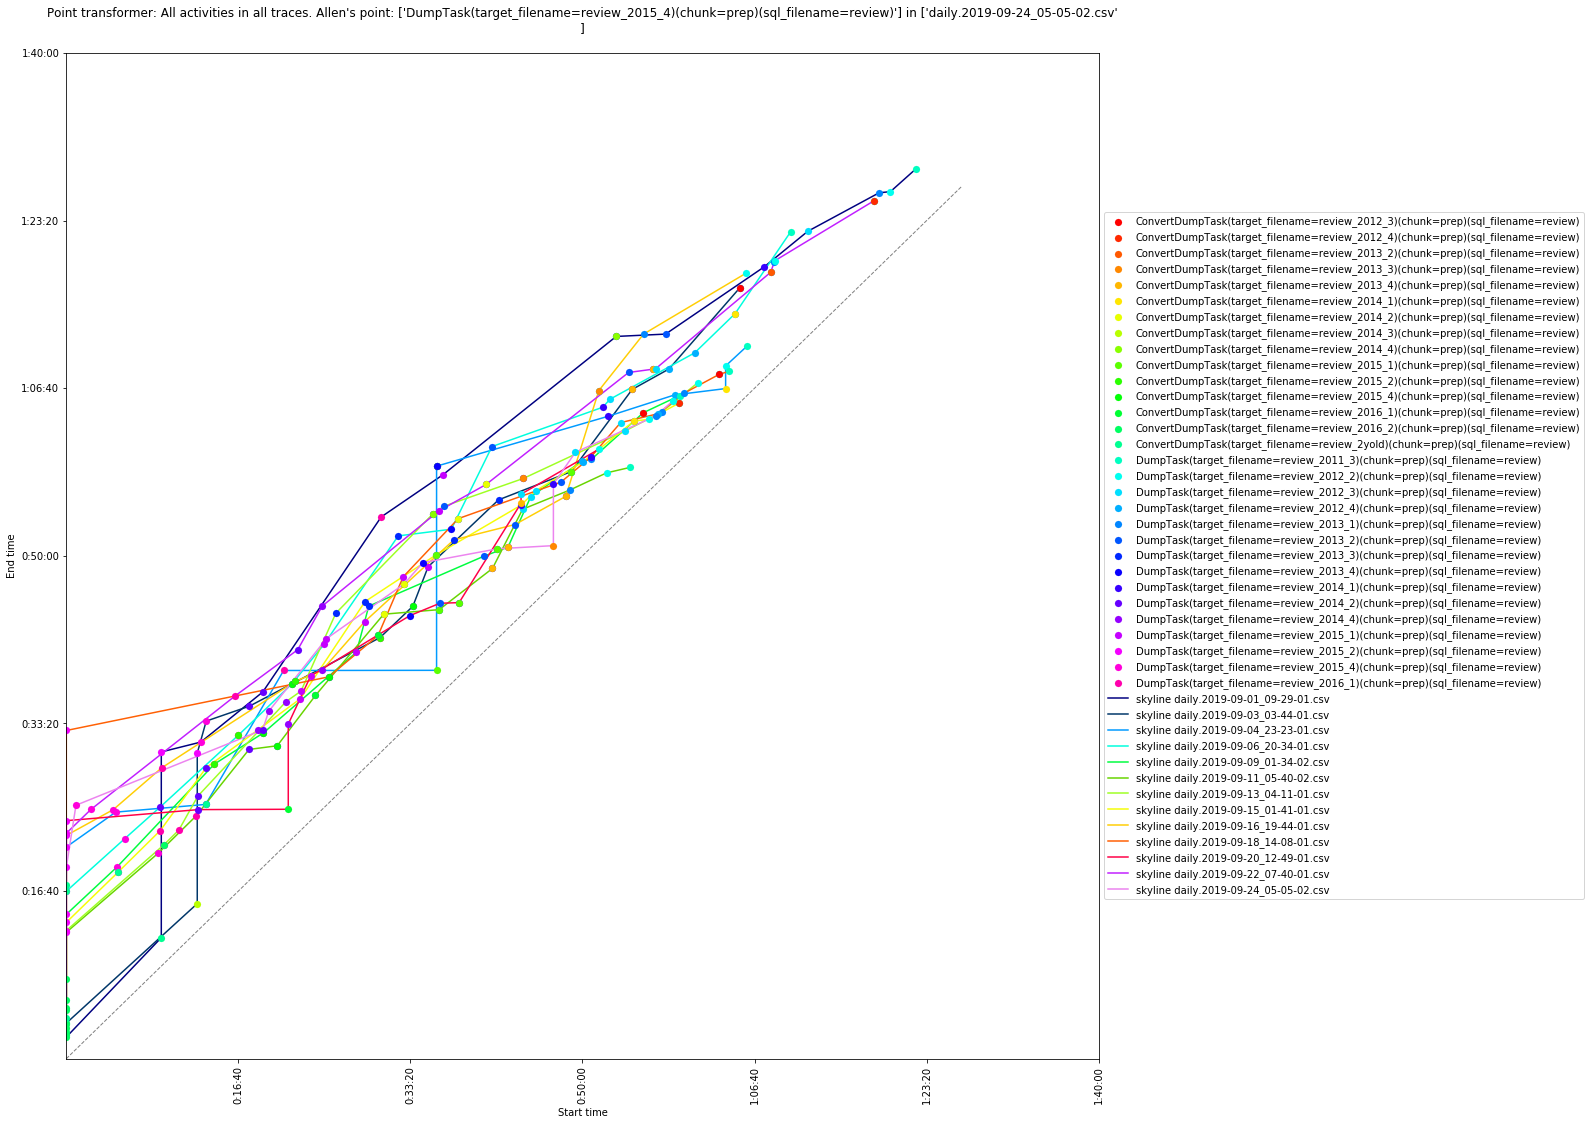

In [58]:
skyline_points = pt.get_skyline_points(all_tasks)
#output_path=LUIGI_LOG_PATH+'graphs/avgActSlideSplit/param_catts_daily.2019-09-All_21_50act_390pts_skylines_allTraces.png'
pt.plot_all_traces(snippet=skyline_points, draw_skylines=1)

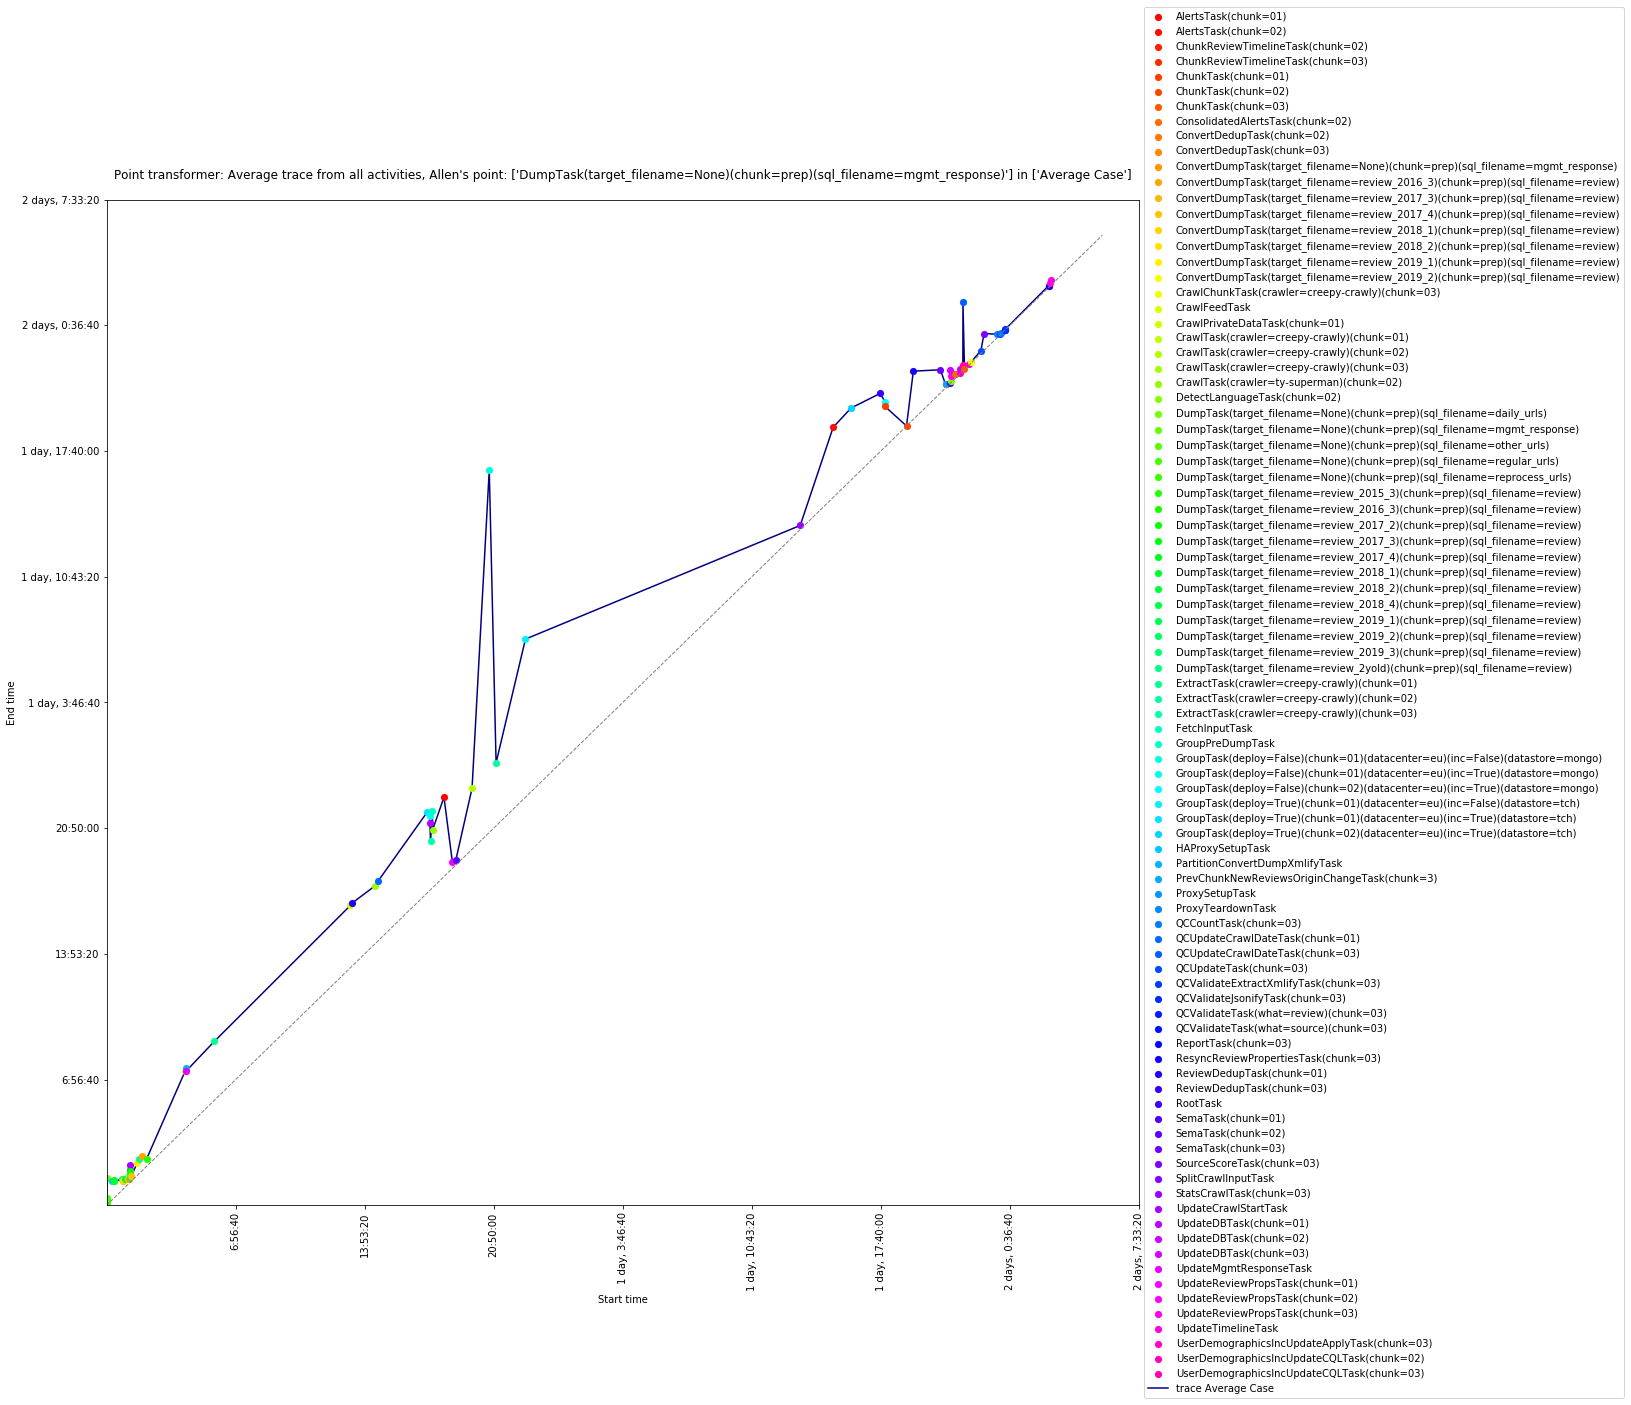

In [15]:
#output_path=LUIGI_LOG_PATH+'graphs/avgActSlideSplit/param_catts_daily.2019-09-All_21_50act_390pts_skylines_averageSkyline.png'
average_points = pt.plot_average_trace(snippet=skyline_points)

# Duration plots
## Duration trace

In [8]:
average_trace_activities.head()

activity average_start  \
0                                      CrawlFeedTask      00:00:00   
1  DumpTask(target_filename=None)(chunk=prep)(sql...      00:00:07   
3  DumpTask(target_filename=None)(chunk=prep)(sql...      00:00:12   
2  DumpTask(target_filename=None)(chunk=prep)(sql...      00:00:16   
5  DumpTask(target_filename=None)(chunk=prep)(sql...      00:00:16   

  average_end  num_start      num_end          case   std_num_end  
0    00:19:47   0.076923  1187.307692  Average Case  4.733160e-13  
1    00:22:53   7.846154  1373.692308  Average Case  4.733160e-13  
3    00:01:31  12.076923    91.923077  Average Case  0.000000e+00  
2    00:01:13  16.692308    73.846154  Average Case  1.479113e-14  
5    00:01:02  16.692308    62.307692  Average Case  1.479113e-14

Index(['activity', 'average_start', 'average_end', 'num_start', 'num_end',
       'case', 'std_num_end'],
      dtype='object')
Saving in  /usr/local/trustyou/home/andream/nfs/processmining/minilogs/daily/graphs/allDataAtOnce/pgr_duration_snippet.png


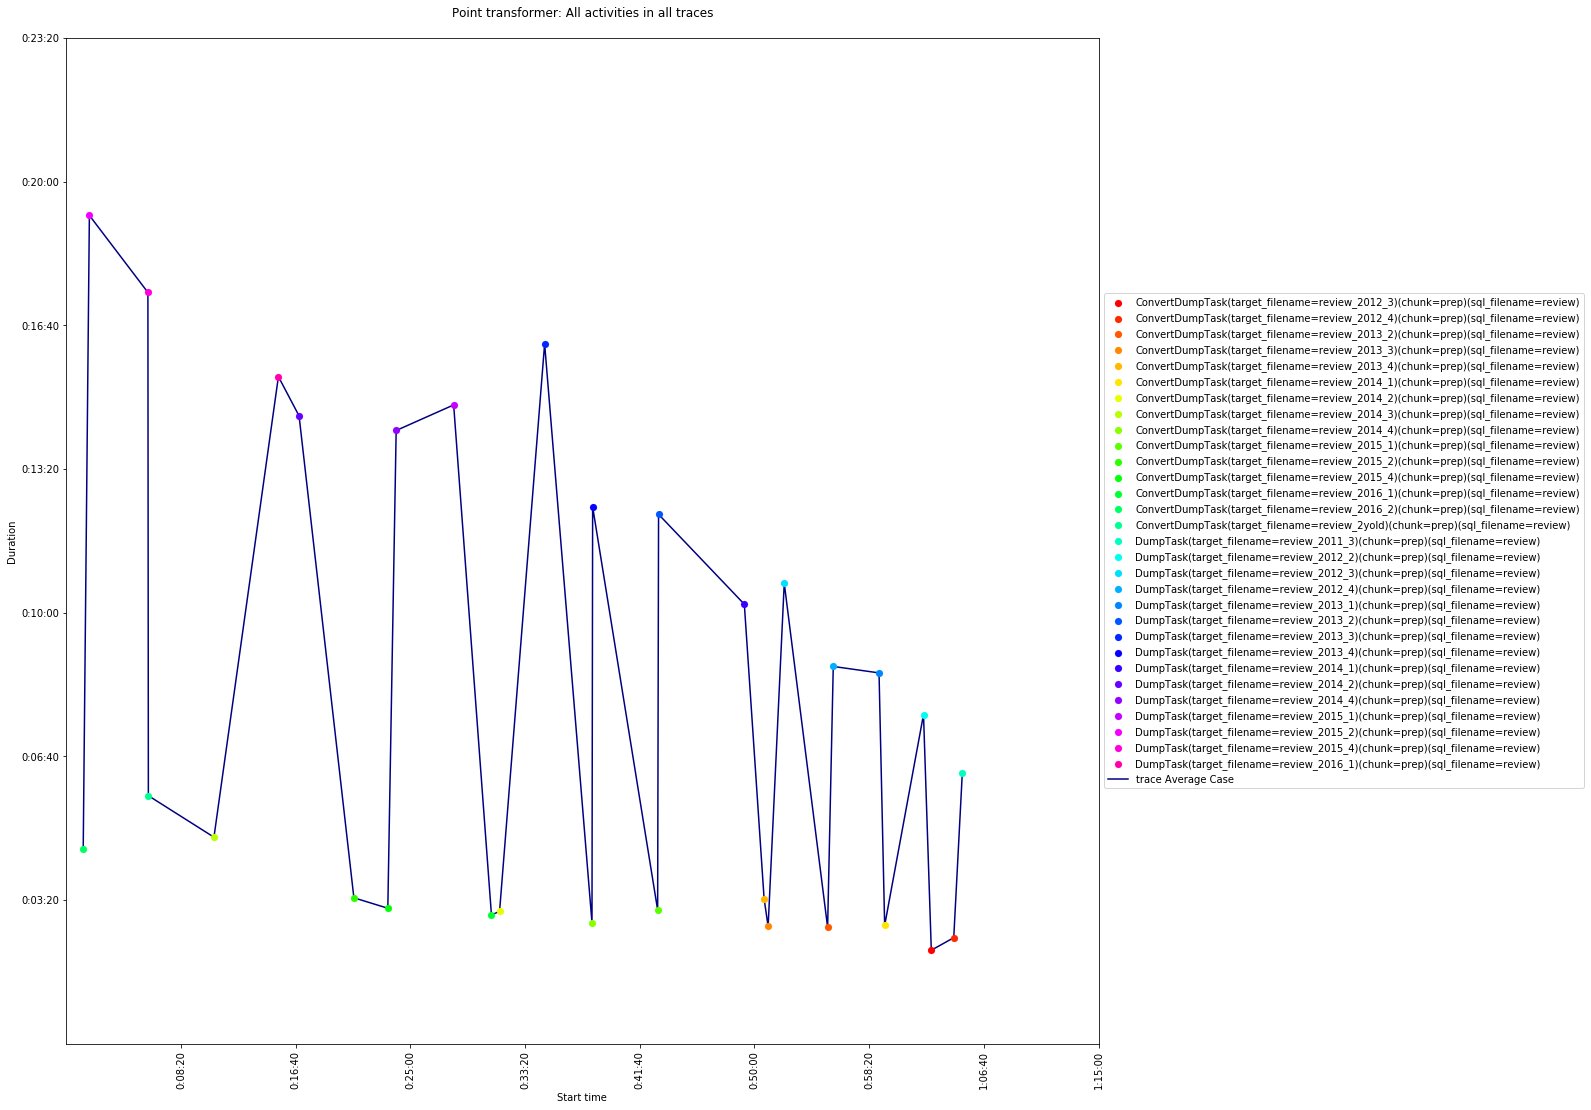

In [26]:
def get_duration(start, end):
    duration = abs(end - start)
    return duration

suspects_and_average = pt.get_data_selection_avgtrace(pt.get_relative_timestamps(subset)).sort_values(by=['num_start'])
print(suspects_and_average.columns)
# Anomaly of number of points in trace
#two_cases=['daily.2019-09-24_05-05-02', 'Average Case']
two_cases=['anomaly', 'Average Case']


w_duration = suspects_and_average[suspects_and_average['case'].isin(two_cases)].loc[:]
#w_duration['duration'] = w_duration.apply(lambda row: str(get_duration(str(row['num_start']),str(row['num_end']))), axis=1)
#w_duration['rel_end']=w_duration['duration']
w_duration['t_duration']= w_duration.apply(lambda row: (get_duration(row['num_start'],row['num_end'])), axis=1)
w_duration['num_end']=w_duration['t_duration']
w_duration = w_duration[['case','activity','num_start', 'num_end']]
    

#skyline_plot= pt.plot_all_traces(snippet=suspects_and_average[suspects_and_average['case'].isin(two_cases)], show_plot=None)
#output_path=LUIGI_LOG_PATH+'graphs/avgActSlideSplit/param_catts_daily.2019-09-All_61_90act_390pts_point_transformer_duration_averageTrace.png'
skyline_plot= pt.plot_duration_alltraces(w_duration, show_plot=None)
#some_plot= plot_star_from_point(skyline_plot, suspects_and_average[suspects_and_average['case'].isin(two_cases)], average_trace_activities)



#output_path=LUIGI_LOG_PATH+'graphs/avgActSlideSplit/param_catts_daily.2019-09-All_21_50act_390pts_number_events_trace_anomaly.png'
#some_plot.savefig(output_path,  bbox_inches='tight')

## Duration skyline

In [ ]:
#skyline_plot= pt.plot_duration_alltraces(w_duration, show_plot=None)
#output_path=LUIGI_LOG_PATH+'graphs/avgActSlideSplit/param_catts_daily.2019-09-All_61_90act_390pts_point_transformer_duration_averageTrace.png'
skyline_sus = pt.get_skyline_points(df=suspects_and_average)
skyline_sus = skyline_sus[skyline_sus['case'].isin(two_cases)].loc[:]
w_duration = skyline_sus[skyline_sus['case'].isin(two_cases)].loc[:]
#w_duration['duration'] = w_duration.apply(lambda row: str(get_duration(str(row['num_start']),str(row['num_end']))), axis=1)
#w_duration['rel_end']=w_duration['duration']
w_duration['t_duration']= w_duration.apply(lambda row: (get_duration(row['num_start'],row['num_end'])), axis=1)
w_duration['num_end']=w_duration['t_duration']
w_duration = w_duration[['case','activity','num_start', 'num_end']]

output_path=LUIGI_LOG_PATH+'graphs/allDataAtOnce/pgr_duration_performance_skyline.png'

#output_path=LUIGI_LOG_PATH+'graphs/avgActSlideSplit/param_catts_daily.2019-09-All_61_90act_390pts_performance_skyline.png'
pt.plot_duration_alltraces(w_duration, show_plot=None, output_path=output_path)
#pt.plot_all_traces(snippet=skyline_sus, show_plot=None)
#pt.plot_all_traces(suspects_and_average[suspects_and_average['case'].isin(two_cases)], show_plot=None)